# Gesture Recognition Experiment - DTW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import os

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

from scipy.spatial.distance import euclidean

from dtaidistance import dtw_ndim
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

from fastdtw import fastdtw

from helper.GestureAuthentication import GestureAuthenticator

g = GestureAuthenticator()


In [2]:
CHOOSED_ALGORITHM = "ctw"

Experiment Set Up
-------------------

|      Algorithms     |
|:--------------------|
| DTW                 |
| FastDTW             |
| Pearson Correlation |
| Euclidean Distance  | 

<br/>

| Gesture Complexity | Gesture Name             |
|--------------------|--------------------------|
| Simple             | Circle, Square, Triangle |
| Medium             | Bowtie, Tornado          |
| Complex            | Signature                |

## Gesture 1: Circle

### Load Data

In [4]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/circle_27012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 35


### Check Same Person Authentication (FRR)

In [5]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0654		0.0058
2	True		0.0826		0.0052
3	True		0.1302		0.0073
4	True		0.1406		0.0060
5	True		0.0545		0.0052
6	True		0.1424		0.0059
7	True		0.0947		0.0050
8	True		0.0462		0.0079
9	True		0.0816		0.0050
10	True		0.1023		0.0050
11	True		0.0811		0.0044
12	True		0.0628		0.0048
13	True		0.0895		0.0052
14	True		0.0618		0.0059
15	False		0.1713		0.0047
16	True		0.0736		0.0052
17	True		0.1337		0.0067
18	True		0.0737		0.0045
19	True		0.1384		0.0056
20	True		0.0673		0.0056
21	True		0.1203		0.0071
22	True		0.1434		0.0059
23	False		0.1552		0.0054
24	True		0.1248		0.0063
25	True		0.1400		0.0063
26	True		0.0406		0.0059
27	True		0.0493		0.0052
28	True		0.1442		0.0057
29	True		0.0759		0.0049
30	True		0.0691		0.0051

False Rejection Rate (FRR): 6.667 %
Average Time: 0.0056


### Check Different Person Authentication (FAR)

In [6]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2763		0.0051
2	False		0.3181		0.0046
3	False		0.4968		0.0036
4	False		0.3440		0.0036
5	False		0.4466		0.0035
6	False		0.2463		0.0023
7	False		0.4858		0.0031
8	False		0.5426		0.0051
9	False		0.2574		0.0043
10	False		0.5151		0.0041
11	True		0.0880		0.0056
12	False		0.4472		0.0031
13	False		0.3146		0.0035
14	False		0.2462		0.0021
15	False		0.4817		0.0030
16	False		0.4427		0.0027
17	True		0.0567		0.0073
18	False		0.3712		0.0027
19	False		0.3092		0.0061
20	False		0.3011		0.0027
21	False		0.2681		0.0046
22	False		0.6687		0.0038
23	False		0.3119		0.0040
24	False		0.1551		0.0046
25	False		0.5487		0.0025
26	False		0.4188		0.0030
27	False		0.4714		0.0038
28	False		0.5056		0.0040
29	False		0.3973		0.0030
30	False		0.3300		0.0040
31	False		0.2446		0.0049
32	False		0.3956		0.0051
33	False		0.2960		0.0041
34	False		0.2309		0.0038
35	True		0.0753		0.0053

False Acceptance Rate (FAR): 8.571 %
Average Time: 0.0040


## Gesture 2: Square

### Load Data

In [8]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/square_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [9]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0973		0.0049
2	True		0.0896		0.0038
3	True		0.0900		0.0047
4	True		0.0900		0.0037
5	True		0.0888		0.0041
6	True		0.0871		0.0050
7	True		0.0913		0.0048
8	True		0.0889		0.0042
9	True		0.0930		0.0039
10	True		0.0945		0.0036
11	True		0.0822		0.0050
12	True		0.1111		0.0034
13	True		0.0911		0.0048
14	True		0.0853		0.0043
15	True		0.0878		0.0038
16	True		0.0864		0.0050
17	True		0.0859		0.0046
18	True		0.0894		0.0042
19	True		0.0848		0.0059
20	True		0.0844		0.0044
21	True		0.0938		0.0041
22	True		0.1034		0.0037
23	True		0.1244		0.0036
24	True		0.1115		0.0047
25	True		0.1111		0.0036
26	True		0.0878		0.0042
27	True		0.0933		0.0038
28	True		0.0856		0.0040
29	True		0.0992		0.0037
30	True		0.0784		0.0053

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0043


(0.0, 0.00533604621887207)

### Check Different Person Authentication (FAR)

In [10]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0034
2	False		0.2165		0.0058
3	True		0.1255		0.0046
4	False		0.1626		0.0038
5	False		0.1654		0.0043
6	False		0.1725		0.0040
7	True		0.1092		0.0055
8	False		0.2149		0.0039
9	False		0.2086		0.0032
10	False		0.1943		0.0041
11	False		0.1942		0.0037
12	False		0.2071		0.0034
13	False		0.2096		0.0035
14	False		0.1976		0.0035
15	False		0.1836		0.0043
16	False		0.3442		0.0034
17	False		0.1597		0.0039
18	False		0.2432		0.0035
19	False		0.1986		0.0036
20	False		0.1741		0.0036
21	True		0.1423		0.0041
22	False		0.2008		0.0037
23	True		0.1107		0.0053
24	False		0.2766		0.0037
25	False		0.1902		0.0036
26	False		0.1775		0.0038
27	True		0.1171		0.0052
28	False		0.1820		0.0040
29	False		0.2214		0.0011
30	False		0.1702		0.0042

False Acceptance Rate (FAR): 16.667 %
Average Time: 0.0039


(16.666666666666664, 0.004168033599853516)

## Gesture 3: Triangle

### Load Data

In [10]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/triangle_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [11]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0112
2	True		0.0741		0.0038
3	True		0.1012		0.0036
4	True		0.1177		0.0066
5	True		0.0940		0.0036
6	True		0.0760		0.0038
7	True		0.0862		0.0036
8	True		0.0641		0.0048
9	True		0.0970		0.0038
10	True		0.1120		0.0034
11	True		0.0841		0.0036
12	True		0.0838		0.0043
13	True		0.0919		0.0034
14	True		0.0649		0.0049
15	True		0.1019		0.0036
16	True		0.0652		0.0039
17	True		0.1282		0.0029
18	True		0.0777		0.0039
19	True		0.0678		0.0047
20	True		0.0760		0.0038
21	True		0.0850		0.0037
22	True		0.1054		0.0032
23	True		0.0795		0.0036
24	True		0.0870		0.0040
25	True		0.1138		0.0033
26	True		0.0753		0.0036
27	True		0.0756		0.0041
28	True		0.1000		0.0036
29	True		0.0996		0.0032
30	True		0.0710		0.0039

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0041


### Check Different Person Authentication (FAR)

In [12]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0028
2	False		0.1912		0.0025
3	False		0.4584		0.0022
4	False		0.3015		0.0027
5	False		0.2015		0.0037
6	False		0.1802		0.0036
7	False		0.1871		0.0028
8	False		0.2175		0.0014
9	False		0.2018		0.0022
10	False		0.1921		0.0026
11	False		0.2038		0.0024
12	False		0.2497		0.0030
13	False		0.1830		0.0037
14	False		0.1978		0.0029
15	False		0.2217		0.0034
16	False		0.2040		0.0035
17	False		0.1713		0.0018
18	False		0.2134		0.0025
19	False		0.2203		0.0027
20	False		0.1983		0.0028
21	False		0.2656		0.0026
22	False		0.1596		0.0029
23	False		0.1536		0.0027
24	False		0.1958		0.0035
25	False		0.1791		0.0028
26	False		0.1664		0.0026
27	False		0.2448		0.0027
28	True		0.1472		0.0031
29	False		0.2777		0.0026
30	False		0.1918		0.0030

False Acceptance Rate (FAR): 3.333 %
Average Time: 0.0028


## Gesture 4: Bowtie

### Load Data

In [13]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/bowtie_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [14]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0042
2	True		0.1043		0.0043
3	True		0.0884		0.0044
4	True		0.0921		0.0043
5	True		0.0888		0.0044
6	True		0.0910		0.0047
7	True		0.0921		0.0042
8	True		0.0948		0.0047
9	True		0.0883		0.0046
10	True		0.1100		0.0042
11	True		0.0869		0.0047
12	True		0.0931		0.0046
13	True		0.0986		0.0045
14	True		0.0925		0.0044
15	True		0.1023		0.0039
16	True		0.0913		0.0043
17	True		0.1031		0.0038
18	True		0.0878		0.0045
19	True		0.0964		0.0042
20	True		0.0966		0.0043
21	True		0.0969		0.0041
22	False		0.1577		0.0038
23	True		0.0945		0.0045
24	True		0.1109		0.0044
25	True		0.1035		0.0042
26	True		0.0925		0.0043
27	True		0.0916		0.0043
28	True		0.0992		0.0044
29	True		0.1015		0.0040
30	True		0.0939		0.0044

False Rejection Rate (FRR): 3.333 %
Average Time: 0.0043


### Check Different Person Authentication (FAR)

In [15]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2498		0.0038
2	False		0.1952		0.0048
3	False		0.2303		0.0040
4	False		0.3825		0.0029
5	False		0.2706		0.0036
6	False		0.2361		0.0042
7	False		0.2677		0.0037
8	False		0.2776		0.0038
9	False		0.2366		0.0037
10	False		0.2492		0.0040
11	False		0.1857		0.0049
12	False		0.2555		0.0036
13	False		0.1936		0.0049
14	False		0.2001		0.0054
15	False		0.2600		0.0038
16	False		0.1778		0.0054
17	False		0.2562		0.0036
18	False		0.2090		0.0047
19	False		0.2646		0.0042
20	False		0.2765		0.0035
21	False		0.2663		0.0040
22	False		0.2040		0.0051
23	False		0.2343		0.0045
24	False		0.2202		0.0046
25	False		0.2094		0.0038
26	False		0.2532		0.0036
27	False		0.1913		0.0053
28	False		0.2958		0.0033
29	False		0.2742		0.0037
30	False		0.1943		0.0066

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0042


## Gesture 5: Tornado

### Load Data

In [18]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/tornado_28012024/')

Stored Gestures: 3
New Gestures: 30
Other Gestures: 30


### Check Same Person Authentication (FRR)

In [19]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2312		0.0068
2	False		0.1918		0.0076
3	False		0.1670		0.0067
4	False		0.2323		0.0056
5	False		0.1937		0.0067
6	True		0.1463		0.0086
7	False		0.2576		0.0058
8	True		0.1482		0.0070
9	False		0.2372		0.0056
10	False		0.2074		0.0068
11	False		0.2278		0.0061
12	False		0.2306		0.0053
13	False		0.2309		0.0060
14	False		0.2658		0.0065
15	False		0.1777		0.0078
16	False		0.2205		0.0064
17	False		0.2011		0.0070
18	True		0.1423		0.0072
19	False		0.2027		0.0071
20	False		0.2361		0.0054
21	False		0.2165		0.0072
22	False		0.1713		0.0089
23	False		0.2507		0.0051
24	False		0.1719		0.0075
25	False		0.2646		0.0047
26	False		0.2422		0.0054
27	False		0.2614		0.0062
28	False		0.2331		0.0058
29	False		0.2411		0.0066
30	False		0.2591		0.0053

False Rejection Rate (FRR): 90.000 %
Average Time: 0.0065


### Check Different Person Authentication (FAR)

In [20]:
g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.2804		0.0062
2	False		0.2683		0.0071
3	False		0.3251		0.0044
4	False		0.3377		0.0045
5	False		0.2665		0.0060
6	False		0.3069		0.0047
7	False		0.3461		0.0058
8	False		0.2699		0.0047
9	False		0.3351		0.0045
10	False		0.2804		0.0065
11	False		0.2740		0.0061
12	False		0.3181		0.0027
13	False		0.2613		0.0075
14	False		0.2420		0.0071
15	False		0.3351		0.0046
16	False		0.2843		0.0059
17	False		0.2411		0.0063
18	False		0.3251		0.0045
19	False		0.3069		0.0045
20	False		0.3377		0.0041
21	False		0.2665		0.0057
22	False		0.3251		0.0044
23	False		0.2804		0.0062
24	False		0.2699		0.0047
25	False		0.2981		0.0071
26	False		0.2411		0.0063
27	False		0.3351		0.0045
28	False		0.2699		0.0047
29	False		0.3351		0.0045
30	False		0.2804		0.0061

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0054


## Gesture 6: Signature

### Load Data

In [62]:
storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures('files/signature_28012024/')

Stored Gestures: 3
New Gestures: 28
Other Gestures: 0


### Check Same Person Authentication (FRR)

In [63]:
g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.15)

Threshold: 0.15

	Authenticated	Distance	Time Taken
1	False		0.1943		0.0037
2	False		0.2330		0.0048
3	False		0.1670		0.0053
4	False		0.1948		0.0048
5	False		0.1950		0.0044
6	False		0.2142		0.0038
7	False		0.1566		0.0043
8	False		0.2158		0.0044
9	True		0.1406		0.0047
10	False		0.1877		0.0045
11	False		0.1649		0.0042
12	False		0.1761		0.0041
13	False		0.1634		0.0048
14	False		0.1726		0.0046
15	False		0.1817		0.0043
16	True		0.1499		0.0047
17	False		0.2440		0.0041
18	False		0.2017		0.0052
19	False		0.2296		0.0042
20	False		0.1635		0.0055
21	False		0.1623		0.0054
22	False		0.1699		0.0041
23	False		0.1555		0.0045
24	False		0.1757		0.0044
25	False		0.2090		0.0045
26	False		0.1625		0.0049
27	True		0.1499		0.0045
28	False		0.1647		0.0047

False Rejection Rate (FRR): 89.286 %
Average Time: 0.0045


## Overall

In [5]:
gestures = ['circle', 'square', 'triangle', 'bowtie', 'tornado', 'signature']

FRRs = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
FARs = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
times = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

for i, gesture in enumerate(gestures):
    storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures(f'files/{gesture}_28012024/')
    FRRs[i], times[i] = g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.19)
    if gesture != 'signature':
        FARs[i], _ = g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=0.19)
    
# Create a dataframe
df = pd.DataFrame({'FRR': FRRs, 'FAR': FARs, 'Average Time': times}, index=gestures)

Stored Gestures: 3
New Gestures: 30
Other Gestures: 35
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	True		0.0654		0.0123
2	True		0.0826		0.0067
3	True		0.1302		0.0053
4	True		0.1406		0.0058
5	True		0.0545		0.0073
6	True		0.1424		0.0043
7	True		0.0947		0.0069
8	True		0.0462		0.0068
9	True		0.0816		0.0078
10	True		0.1023		0.0062
11	True		0.0811		0.0082
12	True		0.0628		0.0097
13	True		0.0895		0.0057
14	True		0.0618		0.0070
15	True		0.1713		0.0050
16	True		0.0736		0.0092
17	True		0.1337		0.0047
18	True		0.0737		0.0075
19	True		0.1384		0.0053
20	True		0.0673		0.0072
21	True		0.1203		0.0057
22	True		0.1434		0.0064
23	True		0.1552		0.0092
24	True		0.1248		0.0054
25	True		0.1400		0.0051
26	True		0.0406		0.0161
27	True		0.0493		0.0097
28	True		0.1442		0.0057
29	True		0.0759		0.0067
30	True		0.0691		0.0086

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0073
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	False		0.2763		0.0053
2	False		0.3181		0.0057
3	False		0.4968		0.0057


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


25	True		0.1111		0.0111
26	True		0.0878		0.0096
27	True		0.0933		0.0105
28	True		0.0856		0.0084
29	True		0.0992		0.0091
30	True		0.0784		0.0091

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0085
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0064
2	False		0.2165		0.0063
3	True		0.1255		0.0088
4	True		0.1626		0.0068
5	True		0.1654		0.0078
6	True		0.1725		0.0097
7	True		0.1092		0.0074
8	False		0.2149		0.0092
9	False		0.2086		0.0067
10	False		0.1943		0.0082
11	False		0.1942		0.0105
12	False		0.2071		0.0061
13	False		0.2096		0.0080
14	False		0.1976		0.0079
15	True		0.1836		0.0065
16	False		0.3442		0.0056
17	True		0.1597		0.0091
18	False		0.2432		0.0079
19	False		0.1986		0.0065
20	True		0.1741		0.0056
21	True		0.1423		0.0058
22	False		0.2008		0.0068
23	True		0.1107		0.0078
24	False		0.2766		0.0057
25	False		0.1902		0.0050
26	True		0.1775		0.0078
27	True		0.1171		0.0066
28	True		0.1820		0.0058
29	False		0.2214		0.0046


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


30	True		0.1702		0.0096

False Acceptance Rate (FAR): 46.667 %
Average Time: 0.0072
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0099
2	True		0.0741		0.0120
3	True		0.1012		0.0102
4	True		0.1177		0.0124
5	True		0.0940		0.0129
6	True		0.0760		0.0110
7	True		0.0862		0.0136
8	True		0.0641		0.0129
9	True		0.0970		0.0139
10	True		0.1120		0.0095
11	True		0.0841		0.0115
12	True		0.0838		0.0087
13	True		0.0919		0.0105
14	True		0.0649		0.0072
15	True		0.1019		0.0099
16	True		0.0652		0.0124
17	True		0.1282		0.0107
18	True		0.0777		0.0113
19	True		0.0678		0.0105
20	True		0.0760		0.0122
21	True		0.0850		0.0082
22	True		0.1054		0.0157
23	True		0.0795		0.0119
24	True		0.0870		0.0111
25	True		0.1138		0.0133
26	True		0.0753		0.0120
27	True		0.0756		0.0167
28	True		0.1000		0.0094
29	True		0.0996		0.0111
30	True		0.0710		0.0137

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0116
Threshold: 0.19

	Authenticated	Distance

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


9	False		0.2018		0.0091
10	False		0.1921		0.0077
11	False		0.2038		0.0062
12	False		0.2497		0.0074
13	True		0.1830		0.0049
14	False		0.1978		0.0073
15	False		0.2217		0.0059
16	False		0.2040		0.0048
17	True		0.1713		0.0050
18	False		0.2134		0.0072
19	False		0.2203		0.0061
20	False		0.1983		0.0092
21	False		0.2656		0.0052
22	True		0.1596		0.0089
23	True		0.1536		0.0093
24	False		0.1958		0.0056
25	True		0.1791		0.0118
26	True		0.1664		0.0059
27	False		0.2448		0.0064
28	True		0.1472		0.0079
29	False		0.2777		0.0049
30	False		0.1918		0.0072

False Acceptance Rate (FAR): 30.000 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0103
2	True		0.1043		0.0081
3	True		0.0884		0.0094
4	True		0.0921		0.0118
5	True		0.0888		0.0073
6	True		0.0910		0.0093
7	True		0.0921		0.0076
8	True		0.0948		0.0085
9	True		0.0883		0.0101
10	True		0.1100		0.0074
11	True		0.0869		0.0093
12	True		0.0931		0.0101
13	True		0.0

In [6]:
pd.options.display.float_format = "{:,.3f}".format
df

,FRR,FAR,Average Time
circle,0.000,11.429,0.009
square,0.000,46.667,0.009
triangle,0.000,30.000,0.014
bowtie,0.000,6.667,0.008
tornado,76.667,0.000,0.005
signature,35.714,0.000,0.006


Stored Gestures: 3
New Gestures: 30
Other Gestures: 35
Threshold: 0.05

	Authenticated	Distance	Time Taken
1	False		0.0654		0.0114
2	False		0.0826		0.0063
3	False		0.1302		0.0048
4	False		0.1406		0.0055
5	False		0.0545		0.0074
6	False		0.1424		0.0045
7	False		0.0947		0.0067
8	True		0.0462		0.0071
9	False		0.0816		0.0082
10	False		0.1023		0.0062
11	False		0.0811		0.0076
12	False		0.0628		0.0095
13	False		0.0895		0.0063
14	False		0.0618		0.0069
15	False		0.1713		0.0049
16	False		0.0736		0.0099
17	False		0.1337		0.0046
18	False		0.0737		0.0075
19	False		0.1384		0.0047
20	False		0.0673		0.0060
21	False		0.1203		0.0057
22	False		0.1434		0.0073
23	False		0.1552		0.0091
24	False		0.1248		0.0050
25	False		0.1400		0.0050
26	True		0.0406		0.0080
27	True		0.0493		0.0098
28	False		0.1442		0.0061
29	False		0.0759		0.0073
30	False		0.0691		0.0086

False Rejection Rate (FRR): 90.000 %
Average Time: 0.0069
Threshold: 0.05

	Authenticated	Distance	Time Taken
1	False		0.2763		0.0052
2	False		0.3181		0.0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


26	False		0.0878		0.0097
27	False		0.0933		0.0106
28	False		0.0856		0.0083
29	False		0.0992		0.0085
30	False		0.0784		0.0087

False Rejection Rate (FRR): 100.000 %
Average Time: 0.0085
Threshold: 0.05

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0059
2	False		0.2165		0.0067
3	False		0.1255		0.0089
4	False		0.1626		0.0074
5	False		0.1654		0.0076
6	False		0.1725		0.0083
7	False		0.1092		0.0066
8	False		0.2149		0.0173
9	False		0.2086		0.0065
10	False		0.1943		0.0063
11	False		0.1942		0.0058
12	False		0.2071		0.0057
13	False		0.2096		0.0071
14	False		0.1976		0.0067
15	False		0.1836		0.0067
16	False		0.3442		0.0047
17	False		0.1597		0.0071
18	False		0.2432		0.0063
19	False		0.1986		0.0057
20	False		0.1741		0.0059
21	False		0.1423		0.0073
22	False		0.2008		0.0069
23	False		0.1107		0.0063
24	False		0.2766		0.0050
25	False		0.1902		0.0051
26	False		0.1775		0.0093
27	False		0.1171		0.0062
28	False		0.1820		0.0057
29	False		0.2214		0.0067
30	False		0.1702		0.0084

False Acceptance Rate

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


1	False		0.0773		0.0118
2	False		0.0741		0.0116
3	False		0.1012		0.0093
4	False		0.1177		0.0123
5	False		0.0940		0.0128
6	False		0.0760		0.0140
7	False		0.0862		0.0120
8	False		0.0641		0.0123
9	False		0.0970		0.0136
10	False		0.1120		0.0098
11	False		0.0841		0.0122
12	False		0.0838		0.0085
13	False		0.0919		0.0099
14	False		0.0649		0.0079
15	False		0.1019		0.0080
16	False		0.0652		0.0120
17	False		0.1282		0.0108
18	False		0.0777		0.0097
19	False		0.0678		0.0098
20	False		0.0760		0.0121
21	False		0.0850		0.0083
22	False		0.1054		0.0157
23	False		0.0795		0.0124
24	False		0.0870		0.0104
25	False		0.1138		0.0125
26	False		0.0753		0.0119
27	False		0.0756		0.0160
28	False		0.1000		0.0096
29	False		0.0996		0.0103
30	False		0.0710		0.0130

False Rejection Rate (FRR): 100.000 %
Average Time: 0.0114
Threshold: 0.05

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0070
2	False		0.1912		0.0070
3	False		0.4584		0.0093
4	False		0.3015		0.0055
5	False		0.2015		0.0046
6	False		0.1802		0.0047
7	F

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


14	False		0.1978		0.0290
15	False		0.2217		0.0054
16	False		0.2040		0.0045
17	False		0.1713		0.0044
18	False		0.2134		0.0086
19	False		0.2203		0.0063
20	False		0.1983		0.0089
21	False		0.2656		0.0052
22	False		0.1596		0.0077
23	False		0.1536		0.0083
24	False		0.1958		0.0052
25	False		0.1791		0.0101
26	False		0.1664		0.0052
27	False		0.2448		0.0073
28	False		0.1472		0.0081
29	False		0.2777		0.0051
30	False		0.1918		0.0074

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0074
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.05

	Authenticated	Distance	Time Taken
1	False		0.0960		0.0100
2	False		0.1043		0.0082
3	False		0.0884		0.0083
4	False		0.0921		0.0112
5	False		0.0888		0.0076
6	False		0.0910		0.0089
7	False		0.0921		0.0080
8	False		0.0948		0.0084
9	False		0.0883		0.0099
10	False		0.1100		0.0075
11	False		0.0869		0.0097
12	False		0.0931		0.0100
13	False		0.0986		0.0079
14	False		0.0925		0.0152
15	False		0.1023		0.0106
16	False		0.0913		0.0080
17	False		0.1031		

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


4	False		0.1626		0.0086
5	False		0.1654		0.0081
6	False		0.1725		0.0078
7	False		0.1092		0.0067
8	False		0.2149		0.0071
9	False		0.2086		0.0060
10	False		0.1943		0.0059
11	False		0.1942		0.0059
12	False		0.2071		0.0052
13	False		0.2096		0.0073
14	False		0.1976		0.0067
15	False		0.1836		0.0065
16	False		0.3442		0.0047
17	False		0.1597		0.0078
18	False		0.2432		0.0067
19	False		0.1986		0.0065
20	False		0.1741		0.0054
21	False		0.1423		0.0060
22	False		0.2008		0.0064
23	False		0.1107		0.0059
24	False		0.2766		0.0056
25	False		0.1902		0.0049
26	False		0.1775		0.0074
27	False		0.1171		0.0061
28	False		0.1820		0.0049
29	False		0.2214		0.0038


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


30	False		0.1702		0.0087

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0065
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.060000000000000005

	Authenticated	Distance	Time Taken
1	False		0.0773		0.0088
2	False		0.0741		0.0108
3	False		0.1012		0.0092
4	False		0.1177		0.0116
5	False		0.0940		0.0123
6	False		0.0760		0.0107
7	False		0.0862		0.0112
8	False		0.0641		0.0118
9	False		0.0970		0.0143
10	False		0.1120		0.0084
11	False		0.0841		0.0104
12	False		0.0838		0.0089
13	False		0.0919		0.0102
14	False		0.0649		0.0077
15	False		0.1019		0.0086
16	False		0.0652		0.0120
17	False		0.1282		0.0103
18	False		0.0777		0.0104
19	False		0.0678		0.0102
20	False		0.0760		0.0124
21	False		0.0850		0.0078
22	False		0.1054		0.0153
23	False		0.0795		0.0126
24	False		0.0870		0.0110
25	False		0.1138		0.0127
26	False		0.0753		0.0130
27	False		0.0756		0.0151
28	False		0.1000		0.0098
29	False		0.0996		0.0110
30	False		0.0710		0.0134

False Rejection Rate (FRR): 100.000 %
Average Time:

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


11	False		0.2038		0.0075
12	False		0.2497		0.0072
13	False		0.1830		0.0053
14	False		0.1978		0.0076
15	False		0.2217		0.0061
16	False		0.2040		0.0050
17	False		0.1713		0.0044
18	False		0.2134		0.0067
19	False		0.2203		0.0069
20	False		0.1983		0.0089
21	False		0.2656		0.0058
22	False		0.1596		0.0082
23	False		0.1536		0.0084
24	False		0.1958		0.0065
25	False		0.1791		0.0106
26	False		0.1664		0.0058
27	False		0.2448		0.0065
28	False		0.1472		0.0078
29	False		0.2777		0.0048
30	False		0.1918		0.0075

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.060000000000000005

	Authenticated	Distance	Time Taken
1	False		0.0960		0.0107
2	False		0.1043		0.0087
3	False		0.0884		0.0083
4	False		0.0921		0.0125
5	False		0.0888		0.0076
6	False		0.0910		0.0091
7	False		0.0921		0.0075
8	False		0.0948		0.0086
9	False		0.0883		0.0102
10	False		0.1100		0.0070
11	False		0.0869		0.0093
12	False		0.0931		0.0099
13	False		0.0986		0.0083
14

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


27	False		0.0933		0.0107
28	False		0.0856		0.0085
29	False		0.0992		0.0091
30	False		0.0784		0.0088

False Rejection Rate (FRR): 100.000 %
Average Time: 0.0083
Threshold: 0.07

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0074
2	False		0.2165		0.0067
3	False		0.1255		0.0089
4	False		0.1626		0.0072
5	False		0.1654		0.0084
6	False		0.1725		0.0089
7	False		0.1092		0.0065
8	False		0.2149		0.0071
9	False		0.2086		0.0072
10	False		0.1943		0.0074
11	False		0.1942		0.0063
12	False		0.2071		0.0050
13	False		0.2096		0.0078
14	False		0.1976		0.0072
15	False		0.1836		0.0069
16	False		0.3442		0.0055
17	False		0.1597		0.0076
18	False		0.2432		0.0073
19	False		0.1986		0.0062
20	False		0.1741		0.0056
21	False		0.1423		0.0139
22	False		0.2008		0.0082
23	False		0.1107		0.0079
24	False		0.2766		0.0060
25	False		0.1902		0.0053
26	False		0.1775		0.0072
27	False		0.1171		0.0059
28	False		0.1820		0.0059
29	False		0.2214		0.0045
30	False		0.1702		0.0083

False Acceptance Rate (FAR): 0.000 %
Average T

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


2	False		0.0741		0.0138
3	False		0.1012		0.0138
4	False		0.1177		0.0344
5	False		0.0940		0.0145
6	False		0.0760		0.0116
7	False		0.0862		0.0122
8	True		0.0641		0.0120
9	False		0.0970		0.0140
10	False		0.1120		0.0093
11	False		0.0841		0.0118
12	False		0.0838		0.0090
13	False		0.0919		0.0106
14	True		0.0649		0.0073
15	False		0.1019		0.0083
16	True		0.0652		0.0119
17	False		0.1282		0.0103
18	False		0.0777		0.0102
19	True		0.0678		0.0102
20	False		0.0760		0.0115
21	False		0.0850		0.0085
22	False		0.1054		0.0159
23	False		0.0795		0.0120
24	False		0.0870		0.0114
25	False		0.1138		0.0123
26	False		0.0753		0.0126
27	False		0.0756		0.0156
28	False		0.1000		0.0099
29	False		0.0996		0.0106
30	False		0.0710		0.0139

False Rejection Rate (FRR): 86.667 %
Average Time: 0.0123
Threshold: 0.07

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0075
2	False		0.1912		0.0082
3	False		0.4584		0.0096
4	False		0.3015		0.0067
5	False		0.2015		0.0044
6	False		0.1802		0.0051
7	False		0.1871		0.0082
8	False	

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


13	False		0.1830		0.0068
14	False		0.1978		0.0082
15	False		0.2217		0.0055
16	False		0.2040		0.0046
17	False		0.1713		0.0047
18	False		0.2134		0.0074
19	False		0.2203		0.0065
20	False		0.1983		0.0089
21	False		0.2656		0.0053
22	False		0.1596		0.0081
23	False		0.1536		0.0082
24	False		0.1958		0.0057
25	False		0.1791		0.0107
26	False		0.1664		0.0065
27	False		0.2448		0.0070
28	False		0.1472		0.0084
29	False		0.2777		0.0047
30	False		0.1918		0.0074

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0069
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.07

	Authenticated	Distance	Time Taken
1	False		0.0960		0.0107
2	False		0.1043		0.0082
3	False		0.0884		0.0086
4	False		0.0921		0.0111
5	False		0.0888		0.0079
6	False		0.0910		0.0105
7	False		0.0921		0.0090
8	False		0.0948		0.0091
9	False		0.0883		0.0095
10	False		0.1100		0.0077
11	False		0.0869		0.0093
12	False		0.0931		0.0102
13	False		0.0986		0.0081
14	False		0.0925		0.0090
15	False		0.1023		0.0093
16	False		0.0913		

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


2	False		0.2165		0.0074
3	False		0.1255		0.0102
4	False		0.1626		0.0076
5	False		0.1654		0.0102
6	False		0.1725		0.0079
7	False		0.1092		0.0064
8	False		0.2149		0.0077
9	False		0.2086		0.0064
10	False		0.1943		0.0063
11	False		0.1942		0.0059
12	False		0.2071		0.0056
13	False		0.2096		0.0102
14	False		0.1976		0.0069
15	False		0.1836		0.0065
16	False		0.3442		0.0059
17	False		0.1597		0.0073
18	False		0.2432		0.0070
19	False		0.1986		0.0059
20	False		0.1741		0.0056
21	False		0.1423		0.0058
22	False		0.2008		0.0066
23	False		0.1107		0.0067
24	False		0.2766		0.0052
25	False		0.1902		0.0064
26	False		0.1775		0.0082
27	False		0.1171		0.0062
28	False		0.1820		0.0050
29	False		0.2214		0.0041
30	False		0.1702		0.0077

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.08000000000000002

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0095
2	True		0.0741		0.0113
3	False		0.1012		0.0095
4	False		0.1177		0.0118
5	False	

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


6	True		0.0760		0.0115
7	False		0.0862		0.0121
8	True		0.0641		0.0127
9	False		0.0970		0.0134
10	False		0.1120		0.0087
11	False		0.0841		0.0109
12	False		0.0838		0.0083
13	False		0.0919		0.0102
14	True		0.0649		0.0077
15	False		0.1019		0.0086
16	True		0.0652		0.0127
17	False		0.1282		0.0110
18	True		0.0777		0.0103
19	True		0.0678		0.0109
20	True		0.0760		0.0111
21	False		0.0850		0.0076
22	False		0.1054		0.0152
23	True		0.0795		0.0122
24	False		0.0870		0.0109
25	False		0.1138		0.0120
26	True		0.0753		0.0126
27	True		0.0756		0.0162
28	False		0.1000		0.0091
29	False		0.0996		0.0103
30	True		0.0710		0.0136

False Rejection Rate (FRR): 56.667 %
Average Time: 0.0111
Threshold: 0.08000000000000002

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0063
2	False		0.1912		0.0072
3	False		0.4584		0.0095
4	False		0.3015		0.0058
5	False		0.2015		0.0043
6	False		0.1802		0.0049
7	False		0.1871		0.0081


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


8	False		0.2175		0.0060
9	False		0.2018		0.0077
10	False		0.1921		0.0074
11	False		0.2038		0.0060
12	False		0.2497		0.0066
13	False		0.1830		0.0055
14	False		0.1978		0.0077
15	False		0.2217		0.0057
16	False		0.2040		0.0049
17	False		0.1713		0.0046
18	False		0.2134		0.0069
19	False		0.2203		0.0057
20	False		0.1983		0.0089
21	False		0.2656		0.0058
22	False		0.1596		0.0077
23	False		0.1536		0.0077
24	False		0.1958		0.0057
25	False		0.1791		0.0097
26	False		0.1664		0.0058
27	False		0.2448		0.0062
28	False		0.1472		0.0081
29	False		0.2777		0.0050
30	False		0.1918		0.0074

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0066
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.08000000000000002

	Authenticated	Distance	Time Taken
1	False		0.0960		0.0102
2	False		0.1043		0.0094
3	False		0.0884		0.0088
4	False		0.0921		0.0109
5	False		0.0888		0.0076
6	False		0.0910		0.0094
7	False		0.0921		0.0077
8	False		0.0948		0.0082
9	False		0.0883		0.0094
10	False		0.1100		0.0071
11	Fa

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


2	False		0.2165		0.0065
3	False		0.1255		0.0087
4	False		0.1626		0.0073
5	False		0.1654		0.0080
6	False		0.1725		0.0092
7	False		0.1092		0.0064
8	False		0.2149		0.0067
9	False		0.2086		0.0063
10	False		0.1943		0.0059
11	False		0.1942		0.0062
12	False		0.2071		0.0052
13	False		0.2096		0.0070
14	False		0.1976		0.0065
15	False		0.1836		0.0071
16	False		0.3442		0.0050
17	False		0.1597		0.0069
18	False		0.2432		0.0071
19	False		0.1986		0.0062
20	False		0.1741		0.0055
21	False		0.1423		0.0059
22	False		0.2008		0.0060
23	False		0.1107		0.0064
24	False		0.2766		0.0061
25	False		0.1902		0.0051
26	False		0.1775		0.0074
27	False		0.1171		0.0055
28	False		0.1820		0.0055
29	False		0.2214		0.0039
30	False		0.1702		0.0075

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0064
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.09000000000000001

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0086
2	True		0.0741		0.0107
3	False		0.1012		0.0091
4	False		0.1177		0.0118
5	False	

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


8	True		0.0641		0.0114
9	False		0.0970		0.0135
10	False		0.1120		0.0078
11	True		0.0841		0.0105
12	True		0.0838		0.0085
13	False		0.0919		0.0099
14	True		0.0649		0.0072
15	False		0.1019		0.0079
16	True		0.0652		0.0112
17	False		0.1282		0.0100
18	True		0.0777		0.0094
19	True		0.0678		0.0102
20	True		0.0760		0.0112
21	True		0.0850		0.0076
22	False		0.1054		0.0150
23	True		0.0795		0.0117
24	True		0.0870		0.0106
25	False		0.1138		0.0119
26	True		0.0753		0.0115
27	True		0.0756		0.0153
28	False		0.1000		0.0091
29	False		0.0996		0.0112
30	True		0.0710		0.0130

False Rejection Rate (FRR): 40.000 %
Average Time: 0.0107
Threshold: 0.09000000000000001

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0060
2	False		0.1912		0.0074
3	False		0.4584		0.0093
4	False		0.3015		0.0052
5	False		0.2015		0.0044
6	False		0.1802		0.0046
7	False		0.1871		0.0074
8	False		0.2175		0.0051
9	False		0.2018		0.0078
10	False		0.1921		0.0075
11	False		0.2038		0.0060


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


12	False		0.2497		0.0074
13	False		0.1830		0.0054
14	False		0.1978		0.0077
15	False		0.2217		0.0045
16	False		0.2040		0.0050
17	False		0.1713		0.0047
18	False		0.2134		0.0069
19	False		0.2203		0.0058
20	False		0.1983		0.0088
21	False		0.2656		0.0054
22	False		0.1596		0.0078
23	False		0.1536		0.0079
24	False		0.1958		0.0052
25	False		0.1791		0.0124
26	False		0.1664		0.0057
27	False		0.2448		0.0064
28	False		0.1472		0.0080
29	False		0.2777		0.0050
30	False		0.1918		0.0080

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0066
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.09000000000000001

	Authenticated	Distance	Time Taken
1	False		0.0960		0.0102
2	False		0.1043		0.0085
3	True		0.0884		0.0085
4	False		0.0921		0.0115
5	True		0.0888		0.0079
6	False		0.0910		0.0096
7	False		0.0921		0.0079
8	False		0.0948		0.0078
9	True		0.0883		0.0090
10	False		0.1100		0.0068
11	True		0.0869		0.0087
12	False		0.0931		0.0098
13	False		0.0986		0.0085
14	False		0.0925		0.0094
15	Fals

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


29	True		0.0992		0.0090
30	True		0.0784		0.0086

False Rejection Rate (FRR): 16.667 %
Average Time: 0.0076
Threshold: 0.1

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0056
2	False		0.2165		0.0060
3	False		0.1255		0.0083
4	False		0.1626		0.0071
5	False		0.1654		0.0076
6	False		0.1725		0.0077
7	False		0.1092		0.0064
8	False		0.2149		0.0065
9	False		0.2086		0.0060
10	False		0.1943		0.0057
11	False		0.1942		0.0056
12	False		0.2071		0.0057
13	False		0.2096		0.0076
14	False		0.1976		0.0072
15	False		0.1836		0.0066
16	False		0.3442		0.0051
17	False		0.1597		0.0072
18	False		0.2432		0.0065
19	False		0.1986		0.0057
20	False		0.1741		0.0057
21	False		0.1423		0.0056
22	False		0.2008		0.0062
23	False		0.1107		0.0061
24	False		0.2766		0.0053
25	False		0.1902		0.0060
26	False		0.1775		0.0075
27	False		0.1171		0.0055
28	False		0.1820		0.0048
29	False		0.2214		0.0032
30	False		0.1702		0.0075

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0063
Stored Gestures: 3
New Gestures: 30
Other 

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


7	True		0.0862		0.0112
8	True		0.0641		0.0107
9	True		0.0970		0.0137
10	False		0.1120		0.0083
11	True		0.0841		0.0100
12	True		0.0838		0.0079
13	True		0.0919		0.0097
14	True		0.0649		0.0070
15	False		0.1019		0.0076
16	True		0.0652		0.0112
17	False		0.1282		0.0100
18	True		0.0777		0.0099
19	True		0.0678		0.0099
20	True		0.0760		0.0110
21	True		0.0850		0.0071
22	False		0.1054		0.0146
23	True		0.0795		0.0114
24	True		0.0870		0.0109
25	False		0.1138		0.0127
26	True		0.0753		0.0120
27	True		0.0756		0.0150
28	False		0.1000		0.0102
29	True		0.0996		0.0109
30	True		0.0710		0.0141

False Rejection Rate (FRR): 26.667 %
Average Time: 0.0106
Threshold: 0.1

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0069
2	False		0.1912		0.0075
3	False		0.4584		0.0097
4	False		0.3015		0.0056
5	False		0.2015		0.0042
6	False		0.1802		0.0043
7	False		0.1871		0.0078
8	False		0.2175		0.0059
9	False		0.2018		0.0076
10	False		0.1921		0.0072


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


11	False		0.2038		0.0068
12	False		0.2497		0.0072
13	False		0.1830		0.0050
14	False		0.1978		0.0071
15	False		0.2217		0.0043
16	False		0.2040		0.0049
17	False		0.1713		0.0045
18	False		0.2134		0.0068
19	False		0.2203		0.0060
20	False		0.1983		0.0090
21	False		0.2656		0.0052
22	False		0.1596		0.0071
23	False		0.1536		0.0075
24	False		0.1958		0.0062
25	False		0.1791		0.0104
26	False		0.1664		0.0054
27	False		0.2448		0.0063
28	False		0.1472		0.0075
29	False		0.2777		0.0046
30	False		0.1918		0.0068

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0065
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.1

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0096
2	False		0.1043		0.0081
3	True		0.0884		0.0083
4	True		0.0921		0.0107
5	True		0.0888		0.0070
6	True		0.0910		0.0093
7	True		0.0921		0.0077
8	True		0.0948		0.0085
9	True		0.0883		0.0093
10	False		0.1100		0.0070
11	True		0.0869		0.0088
12	True		0.0931		0.0095
13	True		0.0986		0.0077
14	True		0.0925		0.0092
15	Fal

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


25	False		0.1111		0.0098
26	True		0.0878		0.0078
27	True		0.0933		0.0102
28	True		0.0856		0.0078
29	True		0.0992		0.0082
30	True		0.0784		0.0086

False Rejection Rate (FRR): 13.333 %
Average Time: 0.0078
Threshold: 0.11000000000000001

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0064
2	False		0.2165		0.0067
3	False		0.1255		0.0088
4	False		0.1626		0.0068
5	False		0.1654		0.0082
6	False		0.1725		0.0090
7	True		0.1092		0.0061
8	False		0.2149		0.0069
9	False		0.2086		0.0062
10	False		0.1943		0.0062
11	False		0.1942		0.0058
12	False		0.2071		0.0052
13	False		0.2096		0.0076
14	False		0.1976		0.0069
15	False		0.1836		0.0064
16	False		0.3442		0.0047
17	False		0.1597		0.0068
18	False		0.2432		0.0062
19	False		0.1986		0.0065
20	False		0.1741		0.0054
21	False		0.1423		0.0060
22	False		0.2008		0.0064
23	False		0.1107		0.0064
24	False		0.2766		0.0049
25	False		0.1902		0.0047
26	False		0.1775		0.0068
27	False		0.1171		0.0059
28	False		0.1820		0.0052
29	False		0.2214		0.0037
30	False		0.17

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


1	True		0.0773		0.0098
2	True		0.0741		0.0108
3	True		0.1012		0.0091
4	False		0.1177		0.0114
5	True		0.0940		0.0119
6	True		0.0760		0.0106
7	True		0.0862		0.0118
8	True		0.0641		0.0116
9	True		0.0970		0.0143
10	False		0.1120		0.0088
11	True		0.0841		0.0112
12	True		0.0838		0.0088
13	True		0.0919		0.0104
14	True		0.0649		0.0075
15	True		0.1019		0.0078
16	True		0.0652		0.0120
17	False		0.1282		0.0104
18	True		0.0777		0.0098
19	True		0.0678		0.0102
20	True		0.0760		0.0115
21	True		0.0850		0.0077
22	True		0.1054		0.0159
23	True		0.0795		0.0125
24	True		0.0870		0.0201
25	False		0.1138		0.0164
26	True		0.0753		0.0139
27	True		0.0756		0.0164
28	True		0.1000		0.0093
29	True		0.0996		0.0107
30	True		0.0710		0.0138

False Rejection Rate (FRR): 13.333 %
Average Time: 0.0115
Threshold: 0.11000000000000001

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0076
2	False		0.1912		0.0075
3	False		0.4584		0.0093
4	False		0.3015		0.0061
5	False		0.2015		0.0043
6	False		0.1802		0.0044
7	False		0.1871

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


14	False		0.1978		0.0090
15	False		0.2217		0.0058
16	False		0.2040		0.0046
17	False		0.1713		0.0054
18	False		0.2134		0.0087
19	False		0.2203		0.0058
20	False		0.1983		0.0101
21	False		0.2656		0.0058
22	False		0.1596		0.0076
23	False		0.1536		0.0077
24	False		0.1958		0.0056
25	False		0.1791		0.0096
26	False		0.1664		0.0053
27	False		0.2448		0.0075
28	False		0.1472		0.0079
29	False		0.2777		0.0054
30	False		0.1918		0.0070

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0069
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.11000000000000001

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0105
2	True		0.1043		0.0078
3	True		0.0884		0.0084
4	True		0.0921		0.0110
5	True		0.0888		0.0075
6	True		0.0910		0.0095
7	True		0.0921		0.0093
8	True		0.0948		0.0089
9	True		0.0883		0.0101
10	False		0.1100		0.0075
11	True		0.0869		0.0098
12	True		0.0931		0.0105
13	True		0.0986		0.0081
14	True		0.0925		0.0096
15	True		0.1023		0.0094
16	True		0.0913		0.0064
17	True		0.1031		0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


3	False		0.1255		0.0103
4	False		0.1626		0.0075
5	False		0.1654		0.0093
6	False		0.1725		0.0084
7	True		0.1092		0.0063
8	False		0.2149		0.0069
9	False		0.2086		0.0065
10	False		0.1943		0.0060
11	False		0.1942		0.0064
12	False		0.2071		0.0054
13	False		0.2096		0.0070
14	False		0.1976		0.0067
15	False		0.1836		0.0071
16	False		0.3442		0.0057
17	False		0.1597		0.0080
18	False		0.2432		0.0065
19	False		0.1986		0.0065
20	False		0.1741		0.0061
21	False		0.1423		0.0061
22	False		0.2008		0.0064
23	True		0.1107		0.0062
24	False		0.2766		0.0058
25	False		0.1902		0.0057
26	False		0.1775		0.0074
27	True		0.1171		0.0060
28	False		0.1820		0.0066
29	False		0.2214		0.0052
30	False		0.1702		0.0081

False Acceptance Rate (FAR): 10.000 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.12000000000000001

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0092
2	True		0.0741		0.0115
3	True		0.1012		0.0093
4	True		0.1177		0.0131
5	True		0.0940		0.0123
6	True		0.076

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


8	True		0.0641		0.0135
9	True		0.0970		0.0140
10	True		0.1120		0.0084
11	True		0.0841		0.0109
12	True		0.0838		0.0086
13	True		0.0919		0.0103
14	True		0.0649		0.0074
15	True		0.1019		0.0082
16	True		0.0652		0.0121
17	False		0.1282		0.0104
18	True		0.0777		0.0104
19	True		0.0678		0.0104
20	True		0.0760		0.0124
21	True		0.0850		0.0075
22	True		0.1054		0.0152
23	True		0.0795		0.0122
24	True		0.0870		0.0109
25	True		0.1138		0.0129
26	True		0.0753		0.0128
27	True		0.0756		0.0158
28	True		0.1000		0.0094
29	True		0.0996		0.0112
30	True		0.0710		0.0142

False Rejection Rate (FRR): 3.333 %
Average Time: 0.0112
Threshold: 0.12000000000000001

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0062
2	False		0.1912		0.0079
3	False		0.4584		0.0093
4	False		0.3015		0.0059
5	False		0.2015		0.0049
6	False		0.1802		0.0049
7	False		0.1871		0.0084
8	False		0.2175		0.0055
9	False		0.2018		0.0075
10	False		0.1921		0.0074
11	False		0.2038		0.0059


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


12	False		0.2497		0.0082
13	False		0.1830		0.0061
14	False		0.1978		0.0078
15	False		0.2217		0.0057
16	False		0.2040		0.0046
17	False		0.1713		0.0047
18	False		0.2134		0.0074
19	False		0.2203		0.0061
20	False		0.1983		0.0092
21	False		0.2656		0.0056
22	False		0.1596		0.0078
23	False		0.1536		0.0080
24	False		0.1958		0.0051
25	False		0.1791		0.0104
26	False		0.1664		0.0063
27	False		0.2448		0.0071
28	False		0.1472		0.0080
29	False		0.2777		0.0049
30	False		0.1918		0.0073

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.12000000000000001

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0116
2	True		0.1043		0.0092
3	True		0.0884		0.0090
4	True		0.0921		0.0125
5	True		0.0888		0.0125
6	True		0.0910		0.0169
7	True		0.0921		0.0099
8	True		0.0948		0.0089
9	True		0.0883		0.0105
10	True		0.1100		0.0083
11	True		0.0869		0.0099
12	True		0.0931		0.0111
13	True		0.0986		0.0086
14	True		0.0925		0.0101
15	True		0.1023		

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


2	False		0.2165		0.0071
3	True		0.1255		0.0095
4	False		0.1626		0.0074
5	False		0.1654		0.0080
6	False		0.1725		0.0094
7	True		0.1092		0.0060
8	False		0.2149		0.0070
9	False		0.2086		0.0064
10	False		0.1943		0.0062
11	False		0.1942		0.0060
12	False		0.2071		0.0057
13	False		0.2096		0.0074
14	False		0.1976		0.0079
15	False		0.1836		0.0072
16	False		0.3442		0.0056
17	False		0.1597		0.0073
18	False		0.2432		0.0068
19	False		0.1986		0.0058
20	False		0.1741		0.0067
21	False		0.1423		0.0063
22	False		0.2008		0.0066
23	True		0.1107		0.0065
24	False		0.2766		0.0055
25	False		0.1902		0.0050
26	False		0.1775		0.0075
27	True		0.1171		0.0067
28	False		0.1820		0.0059
29	False		0.2214		0.0039
30	False		0.1702		0.0083

False Acceptance Rate (FAR): 13.333 %
Average Time: 0.0067
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.13

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0094
2	True		0.0741		0.0119
3	True		0.1012		0.0099
4	True		0.1177		0.0118
5	True		0.0940		0.0129
6	Tru

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


7	True		0.0862		0.0129
8	True		0.0641		0.0134
9	True		0.0970		0.0138
10	True		0.1120		0.0093
11	True		0.0841		0.0108
12	True		0.0838		0.0083
13	True		0.0919		0.0105
14	True		0.0649		0.0077
15	True		0.1019		0.0079
16	True		0.0652		0.0123
17	True		0.1282		0.0125
18	True		0.0777		0.0102
19	True		0.0678		0.0110
20	True		0.0760		0.0113
21	True		0.0850		0.0078
22	True		0.1054		0.0154
23	True		0.0795		0.0125
24	True		0.0870		0.0114
25	True		0.1138		0.0125
26	True		0.0753		0.0116
27	True		0.0756		0.0172
28	True		0.1000		0.0098
29	True		0.0996		0.0111
30	True		0.0710		0.0139

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0114
Threshold: 0.13

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0066
2	False		0.1912		0.0075
3	False		0.4584		0.0092
4	False		0.3015		0.0054
5	False		0.2015		0.0046
6	False		0.1802		0.0048
7	False		0.1871		0.0084
8	False		0.2175		0.0054


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


9	False		0.2018		0.0092
10	False		0.1921		0.0077
11	False		0.2038		0.0057
12	False		0.2497		0.0071
13	False		0.1830		0.0051
14	False		0.1978		0.0080
15	False		0.2217		0.0061
16	False		0.2040		0.0050
17	False		0.1713		0.0046
18	False		0.2134		0.0068
19	False		0.2203		0.0058
20	False		0.1983		0.0089
21	False		0.2656		0.0056
22	False		0.1596		0.0099
23	False		0.1536		0.0099
24	False		0.1958		0.0063
25	False		0.1791		0.0121
26	False		0.1664		0.0061
27	False		0.2448		0.0065
28	False		0.1472		0.0085
29	False		0.2777		0.0052
30	False		0.1918		0.0073

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0070
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.13

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0103
2	True		0.1043		0.0086
3	True		0.0884		0.0093
4	True		0.0921		0.0116
5	True		0.0888		0.0080
6	True		0.0910		0.0090
7	True		0.0921		0.0083
8	True		0.0948		0.0089
9	True		0.0883		0.0104
10	True		0.1100		0.0082
11	True		0.0869		0.0097
12	True		0.0931		0.0106
13	Tru

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


25	True		0.1111		0.0092
26	True		0.0878		0.0080
27	True		0.0933		0.0099
28	True		0.0856		0.0081
29	True		0.0992		0.0083
30	True		0.0784		0.0081

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0078
Threshold: 0.14

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0058
2	False		0.2165		0.0063
3	True		0.1255		0.0089
4	False		0.1626		0.0071
5	False		0.1654		0.0073
6	False		0.1725		0.0085
7	True		0.1092		0.0072
8	False		0.2149		0.0072
9	False		0.2086		0.0065
10	False		0.1943		0.0056
11	False		0.1942		0.0054
12	False		0.2071		0.0052
13	False		0.2096		0.0071
14	False		0.1976		0.0064
15	False		0.1836		0.0064
16	False		0.3442		0.0049
17	False		0.1597		0.0074
18	False		0.2432		0.0065
19	False		0.1986		0.0055
20	False		0.1741		0.0058
21	False		0.1423		0.0059
22	False		0.2008		0.0064
23	True		0.1107		0.0065
24	False		0.2766		0.0058
25	False		0.1902		0.0053
26	False		0.1775		0.0069
27	True		0.1171		0.0061
28	False		0.1820		0.0056
29	False		0.2214		0.0036
30	False		0.1702		0.0077

False Ac

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


2	True		0.0741		0.0120
3	True		0.1012		0.0097
4	True		0.1177		0.0117
5	True		0.0940		0.0120
6	True		0.0760		0.0104
7	True		0.0862		0.0113
8	True		0.0641		0.0114
9	True		0.0970		0.0136
10	True		0.1120		0.0081
11	True		0.0841		0.0106
12	True		0.0838		0.0090
13	True		0.0919		0.0114
14	True		0.0649		0.0071
15	True		0.1019		0.0076
16	True		0.0652		0.0112
17	True		0.1282		0.0097
18	True		0.0777		0.0095
19	True		0.0678		0.0097
20	True		0.0760		0.0113
21	True		0.0850		0.0075
22	True		0.1054		0.0150
23	True		0.0795		0.0124
24	True		0.0870		0.0109
25	True		0.1138		0.0119
26	True		0.0753		0.0115
27	True		0.0756		0.0150
28	True		0.1000		0.0095
29	True		0.0996		0.0105
30	True		0.0710		0.0130

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0108
Threshold: 0.14

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0060
2	False		0.1912		0.0067
3	False		0.4584		0.0087


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


4	False		0.3015		0.0060
5	False		0.2015		0.0048
6	False		0.1802		0.0045
7	False		0.1871		0.0076
8	False		0.2175		0.0052
9	False		0.2018		0.0075
10	False		0.1921		0.0071
11	False		0.2038		0.0057
12	False		0.2497		0.0065
13	False		0.1830		0.0048
14	False		0.1978		0.0070
15	False		0.2217		0.0044
16	False		0.2040		0.0051
17	False		0.1713		0.0047
18	False		0.2134		0.0094
19	False		0.2203		0.0069
20	False		0.1983		0.0089
21	False		0.2656		0.0054
22	False		0.1596		0.0074
23	False		0.1536		0.0079
24	False		0.1958		0.0053
25	False		0.1791		0.0098
26	False		0.1664		0.0053
27	False		0.2448		0.0060
28	False		0.1472		0.0074
29	False		0.2777		0.0046
30	False		0.1918		0.0071

False Acceptance Rate (FAR): 0.000 %
Average Time: 0.0065
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.14

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0108
2	True		0.1043		0.0081
3	True		0.0884		0.0082
4	True		0.0921		0.0105
5	True		0.0888		0.0070
6	True		0.0910		0.0087
7	True		0.0921		0.0075
8	Tr

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


5	False		0.1654		0.0081
6	False		0.1725		0.0092
7	True		0.1092		0.0063
8	False		0.2149		0.0065
9	False		0.2086		0.0062
10	False		0.1943		0.0056
11	False		0.1942		0.0058
12	False		0.2071		0.0051
13	False		0.2096		0.0074
14	False		0.1976		0.0070
15	False		0.1836		0.0064
16	False		0.3442		0.0051
17	False		0.1597		0.0074
18	False		0.2432		0.0066
19	False		0.1986		0.0060
20	False		0.1741		0.0061
21	True		0.1423		0.0059
22	False		0.2008		0.0064
23	True		0.1107		0.0062
24	False		0.2766		0.0049
25	False		0.1902		0.0055
26	False		0.1775		0.0077
27	True		0.1171		0.0059
28	False		0.1820		0.0050
29	False		0.2214		0.0041
30	False		0.1702		0.0076

False Acceptance Rate (FAR): 16.667 %
Average Time: 0.0064
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.15000000000000002

	Authenticated	Distance	Time Taken


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


1	True		0.0773		0.0101
2	True		0.0741		0.0113
3	True		0.1012		0.0097
4	True		0.1177		0.0121
5	True		0.0940		0.0130
6	True		0.0760		0.0106
7	True		0.0862		0.0114
8	True		0.0641		0.0123
9	True		0.0970		0.0137
10	True		0.1120		0.0085
11	True		0.0841		0.0115
12	True		0.0838		0.0087
13	True		0.0919		0.0102
14	True		0.0649		0.0074
15	True		0.1019		0.0080
16	True		0.0652		0.0118
17	True		0.1282		0.0104
18	True		0.0777		0.0097
19	True		0.0678		0.0100
20	True		0.0760		0.0119
21	True		0.0850		0.0086
22	True		0.1054		0.0180
23	True		0.0795		0.0149
24	True		0.0870		0.0127
25	True		0.1138		0.0130
26	True		0.0753		0.0127
27	True		0.0756		0.0157
28	True		0.1000		0.0095
29	True		0.0996		0.0109
30	True		0.0710		0.0144

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0114
Threshold: 0.15000000000000002

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0075
2	False		0.1912		0.0083
3	False		0.4584		0.0099
4	False		0.3015		0.0055
5	False		0.2015		0.0051
6	False		0.1802		0.0044
7	False		0.1871		0.0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


14	False		0.1978		0.0171
15	False		0.2217		0.0095
16	False		0.2040		0.0067
17	False		0.1713		0.0047
18	False		0.2134		0.0091
19	False		0.2203		0.0063
20	False		0.1983		0.0140
21	False		0.2656		0.0060
22	False		0.1596		0.0086
23	False		0.1536		0.0120
24	False		0.1958		0.0078
25	False		0.1791		0.0130
26	False		0.1664		0.0065
27	False		0.2448		0.0069
28	True		0.1472		0.0089
29	False		0.2777		0.0056
30	False		0.1918		0.0076

False Acceptance Rate (FAR): 3.333 %
Average Time: 0.0093
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.15000000000000002

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0108
2	True		0.1043		0.0083
3	True		0.0884		0.0085
4	True		0.0921		0.0118
5	True		0.0888		0.0079
6	True		0.0910		0.0110
7	True		0.0921		0.0085
8	True		0.0948		0.0086
9	True		0.0883		0.0102
10	True		0.1100		0.0080
11	True		0.0869		0.0098
12	True		0.0931		0.0111
13	True		0.0986		0.0085
14	True		0.0925		0.0096
15	True		0.1023		0.0093
16	True		0.0913		0.0068
17	True		0.1031		0.0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


26	True		0.0878		0.0087
27	True		0.0933		0.0106
28	True		0.0856		0.0084
29	True		0.0992		0.0089
30	True		0.0784		0.0092

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0082
Threshold: 0.16000000000000003

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0060
2	False		0.2165		0.0063
3	True		0.1255		0.0090
4	False		0.1626		0.0075
5	False		0.1654		0.0077
6	False		0.1725		0.0096
7	True		0.1092		0.0072
8	False		0.2149		0.0075
9	False		0.2086		0.0065
10	False		0.1943		0.0059
11	False		0.1942		0.0063
12	False		0.2071		0.0052
13	False		0.2096		0.0073
14	False		0.1976		0.0070
15	False		0.1836		0.0069
16	False		0.3442		0.0050
17	True		0.1597		0.0075
18	False		0.2432		0.0063
19	False		0.1986		0.0063
20	False		0.1741		0.0069
21	True		0.1423		0.0063
22	False		0.2008		0.0062
23	True		0.1107		0.0063
24	False		0.2766		0.0052
25	False		0.1902		0.0054
26	False		0.1775		0.0073
27	True		0.1171		0.0060
28	False		0.1820		0.0057
29	False		0.2214		0.0040
30	False		0.1702		0.0082

False Acceptance Ra

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


2	True		0.0741		0.0122
3	True		0.1012		0.0103
4	True		0.1177		0.0121
5	True		0.0940		0.0128
6	True		0.0760		0.0133
7	True		0.0862		0.0118
8	True		0.0641		0.0127
9	True		0.0970		0.0137
10	True		0.1120		0.0087
11	True		0.0841		0.0108
12	True		0.0838		0.0091
13	True		0.0919		0.0107
14	True		0.0649		0.0072
15	True		0.1019		0.0083
16	True		0.0652		0.0117
17	True		0.1282		0.0107
18	True		0.0777		0.0106
19	True		0.0678		0.0102
20	True		0.0760		0.0115
21	True		0.0850		0.0080
22	True		0.1054		0.0165
23	True		0.0795		0.0124
24	True		0.0870		0.0112
25	True		0.1138		0.0126
26	True		0.0753		0.0121
27	True		0.0756		0.0162
28	True		0.1000		0.0097
29	True		0.0996		0.0109
30	True		0.0710		0.0138

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0114
Threshold: 0.16000000000000003

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0069
2	False		0.1912		0.0079
3	False		0.4584		0.0095
4	False		0.3015		0.0058
5	False		0.2015		0.0044
6	False		0.1802		0.0047
7	False		0.1871		0.0077
8	False		0.2175		0.

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


15	False		0.2217		0.0064
16	False		0.2040		0.0053
17	False		0.1713		0.0044
18	False		0.2134		0.0068
19	False		0.2203		0.0060
20	False		0.1983		0.0088
21	False		0.2656		0.0057
22	True		0.1596		0.0079
23	True		0.1536		0.0079
24	False		0.1958		0.0053
25	False		0.1791		0.0096
26	False		0.1664		0.0058
27	False		0.2448		0.0066
28	True		0.1472		0.0099
29	False		0.2777		0.0060
30	False		0.1918		0.0076

False Acceptance Rate (FAR): 10.000 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.16000000000000003

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0105
2	True		0.1043		0.0085
3	True		0.0884		0.0085
4	True		0.0921		0.0108
5	True		0.0888		0.0077
6	True		0.0910		0.0085
7	True		0.0921		0.0075
8	True		0.0948		0.0083
9	True		0.0883		0.0106
10	True		0.1100		0.0078
11	True		0.0869		0.0089
12	True		0.0931		0.0103
13	True		0.0986		0.0084
14	True		0.0925		0.0096
15	True		0.1023		0.0088
16	True		0.0913		0.0067
17	True		0.1031		0.0076
18	True		0.0878		0.007

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


5	True		0.1654		0.0082
6	False		0.1725		0.0094
7	True		0.1092		0.0064
8	False		0.2149		0.0069
9	False		0.2086		0.0063
10	False		0.1943		0.0059
11	False		0.1942		0.0058
12	False		0.2071		0.0052
13	False		0.2096		0.0071
14	False		0.1976		0.0067
15	False		0.1836		0.0069
16	False		0.3442		0.0050
17	True		0.1597		0.0069
18	False		0.2432		0.0072
19	False		0.1986		0.0072
20	False		0.1741		0.0061
21	True		0.1423		0.0058
22	False		0.2008		0.0062
23	True		0.1107		0.0060
24	False		0.2766		0.0058
25	False		0.1902		0.0051
26	False		0.1775		0.0075
27	True		0.1171		0.0058
28	False		0.1820		0.0048
29	False		0.2214		0.0033
30	False		0.1702		0.0075

False Acceptance Rate (FAR): 26.667 %
Average Time: 0.0064
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.17000000000000004

	Authenticated	Distance	Time Taken


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


1	True		0.0773		0.0101
2	True		0.0741		0.0115
3	True		0.1012		0.0089
4	True		0.1177		0.0114
5	True		0.0940		0.0126
6	True		0.0760		0.0106
7	True		0.0862		0.0113
8	True		0.0641		0.0115
9	True		0.0970		0.0142
10	True		0.1120		0.0080
11	True		0.0841		0.0105
12	True		0.0838		0.0084
13	True		0.0919		0.0102
14	True		0.0649		0.0069
15	True		0.1019		0.0081
16	True		0.0652		0.0115
17	True		0.1282		0.0097
18	True		0.0777		0.0093
19	True		0.0678		0.0096
20	True		0.0760		0.0113
21	True		0.0850		0.0074
22	True		0.1054		0.0151
23	True		0.0795		0.0115
24	True		0.0870		0.0104
25	True		0.1138		0.0117
26	True		0.0753		0.0121
27	True		0.0756		0.0154
28	True		0.1000		0.0093
29	True		0.0996		0.0099
30	True		0.0710		0.0136

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0107
Threshold: 0.17000000000000004

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0063
2	False		0.1912		0.0077
3	False		0.4584		0.0098
4	False		0.3015		0.0054
5	False		0.2015		0.0042
6	False		0.1802		0.0045
7	False		0.1871		0.0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


16	False		0.2040		0.0054
17	False		0.1713		0.0045
18	False		0.2134		0.0066
19	False		0.2203		0.0057
20	False		0.1983		0.0085
21	False		0.2656		0.0051
22	True		0.1596		0.0071
23	True		0.1536		0.0075
24	False		0.1958		0.0049
25	False		0.1791		0.0093
26	True		0.1664		0.0052
27	False		0.2448		0.0065
28	True		0.1472		0.0081
29	False		0.2777		0.0062
30	False		0.1918		0.0079

False Acceptance Rate (FAR): 13.333 %
Average Time: 0.0065
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.17000000000000004

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0105
2	True		0.1043		0.0077
3	True		0.0884		0.0084
4	True		0.0921		0.0105
5	True		0.0888		0.0070
6	True		0.0910		0.0090
7	True		0.0921		0.0078
8	True		0.0948		0.0083
9	True		0.0883		0.0094
10	True		0.1100		0.0080
11	True		0.0869		0.0095
12	True		0.0931		0.0097
13	True		0.0986		0.0077
14	True		0.0925		0.0087
15	True		0.1023		0.0088
16	True		0.0913		0.0062
17	True		0.1031		0.0077
18	True		0.0878		0.0078
19	True		0.0964		0.0079


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


2	False		0.2165		0.0074
3	True		0.1255		0.0094
4	True		0.1626		0.0073
5	True		0.1654		0.0077
6	True		0.1725		0.0087
7	True		0.1092		0.0061
8	False		0.2149		0.0078
9	False		0.2086		0.0066
10	False		0.1943		0.0062
11	False		0.1942		0.0061
12	False		0.2071		0.0052
13	False		0.2096		0.0070
14	False		0.1976		0.0070
15	False		0.1836		0.0073
16	False		0.3442		0.0053
17	True		0.1597		0.0072
18	False		0.2432		0.0064
19	False		0.1986		0.0058
20	True		0.1741		0.0053
21	True		0.1423		0.0058
22	False		0.2008		0.0063
23	True		0.1107		0.0062
24	False		0.2766		0.0051
25	False		0.1902		0.0052
26	True		0.1775		0.0072
27	True		0.1171		0.0058
28	False		0.1820		0.0062
29	False		0.2214		0.0041
30	True		0.1702		0.0082

False Acceptance Rate (FAR): 40.000 %
Average Time: 0.0065
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.18000000000000005

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0096
2	True		0.0741		0.0111
3	True		0.1012		0.0092
4	True		0.1177		0.0124
5	True		0.0940		0.013

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


8	True		0.0641		0.0133
9	True		0.0970		0.0140
10	True		0.1120		0.0084
11	True		0.0841		0.0108
12	True		0.0838		0.0083
13	True		0.0919		0.0099
14	True		0.0649		0.0072
15	True		0.1019		0.0078
16	True		0.0652		0.0125
17	True		0.1282		0.0102
18	True		0.0777		0.0096
19	True		0.0678		0.0103
20	True		0.0760		0.0120
21	True		0.0850		0.0076
22	True		0.1054		0.0149
23	True		0.0795		0.0118
24	True		0.0870		0.0108
25	True		0.1138		0.0124
26	True		0.0753		0.0118
27	True		0.0756		0.0150
28	True		0.1000		0.0089
29	True		0.0996		0.0114
30	True		0.0710		0.0142

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0110
Threshold: 0.18000000000000005

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0060
2	False		0.1912		0.0073
3	False		0.4584		0.0099
4	False		0.3015		0.0058
5	False		0.2015		0.0045
6	False		0.1802		0.0047
7	False		0.1871		0.0078
8	False		0.2175		0.0053
9	False		0.2018		0.0078
10	False		0.1921		0.0073
11	False		0.2038		0.0059


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


12	False		0.2497		0.0072
13	False		0.1830		0.0049
14	False		0.1978		0.0071
15	False		0.2217		0.0043
16	False		0.2040		0.0047
17	True		0.1713		0.0046
18	False		0.2134		0.0070
19	False		0.2203		0.0061
20	False		0.1983		0.0088
21	False		0.2656		0.0059
22	True		0.1596		0.0076
23	True		0.1536		0.0081
24	False		0.1958		0.0057
25	True		0.1791		0.0106
26	True		0.1664		0.0060
27	False		0.2448		0.0069
28	True		0.1472		0.0084
29	False		0.2777		0.0049
30	False		0.1918		0.0068

False Acceptance Rate (FAR): 20.000 %
Average Time: 0.0066
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.18000000000000005

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0096
2	True		0.1043		0.0079
3	True		0.0884		0.0083
4	True		0.0921		0.0109
5	True		0.0888		0.0076
6	True		0.0910		0.0099
7	True		0.0921		0.0081
8	True		0.0948		0.0085
9	True		0.0883		0.0092
10	True		0.1100		0.0072
11	True		0.0869		0.0092
12	True		0.0931		0.0103
13	True		0.0986		0.0083
14	True		0.0925		0.0093
15	True		0.1023		0.009

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


28	True		0.0856		0.0118
29	True		0.0992		0.0137
30	True		0.0784		0.0474

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0158
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0097
2	False		0.2165		0.0081
3	True		0.1255		0.0095
4	True		0.1626		0.0071
5	True		0.1654		0.0075
6	True		0.1725		0.0097
7	True		0.1092		0.0064
8	False		0.2149		0.0067
9	False		0.2086		0.0063
10	False		0.1943		0.0065
11	False		0.1942		0.0058
12	False		0.2071		0.0053
13	False		0.2096		0.0071
14	False		0.1976		0.0094
15	True		0.1836		0.0073
16	False		0.3442		0.0049
17	True		0.1597		0.0070
18	False		0.2432		0.0063
19	False		0.1986		0.0059
20	True		0.1741		0.0054
21	True		0.1423		0.0062
22	False		0.2008		0.0066
23	True		0.1107		0.0061
24	False		0.2766		0.0055
25	False		0.1902		0.0050
26	True		0.1775		0.0071
27	True		0.1171		0.0071
28	True		0.1820		0.0058
29	False		0.2214		0.0043
30	True		0.1702		0.0079

False Acceptance Rate (FAR): 46.667 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


8	True		0.0641		0.0126
9	True		0.0970		0.0136
10	True		0.1120		0.0086
11	True		0.0841		0.0104
12	True		0.0838		0.0081
13	True		0.0919		0.0101
14	True		0.0649		0.0069
15	True		0.1019		0.0075
16	True		0.0652		0.0125
17	True		0.1282		0.0099
18	True		0.0777		0.0104
19	True		0.0678		0.0106
20	True		0.0760		0.0126
21	True		0.0850		0.0074
22	True		0.1054		0.0155
23	True		0.0795		0.0124
24	True		0.0870		0.0109
25	True		0.1138		0.0119
26	True		0.0753		0.0117
27	True		0.0756		0.0151
28	True		0.1000		0.0095
29	True		0.0996		0.0113
30	True		0.0710		0.0141

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0111
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0061
2	False		0.1912		0.0067
3	False		0.4584		0.0091
4	False		0.3015		0.0053
5	False		0.2015		0.0048
6	True		0.1802		0.0043
7	True		0.1871		0.0079
8	False		0.2175		0.0050
9	False		0.2018		0.0073
10	False		0.1921		0.0073
11	False		0.2038		0.0059


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


12	False		0.2497		0.0074
13	True		0.1830		0.0058
14	False		0.1978		0.0076
15	False		0.2217		0.0046
16	False		0.2040		0.0054
17	True		0.1713		0.0045
18	False		0.2134		0.0068
19	False		0.2203		0.0058
20	False		0.1983		0.0091
21	False		0.2656		0.0053
22	True		0.1596		0.0075
23	True		0.1536		0.0075
24	False		0.1958		0.0055
25	True		0.1791		0.0110
26	True		0.1664		0.0058
27	False		0.2448		0.0063
28	True		0.1472		0.0079
29	False		0.2777		0.0052
30	False		0.1918		0.0076

False Acceptance Rate (FAR): 30.000 %
Average Time: 0.0065
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.19

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0100
2	True		0.1043		0.0083
3	True		0.0884		0.0087
4	True		0.0921		0.0108
5	True		0.0888		0.0081
6	True		0.0910		0.0095
7	True		0.0921		0.0076
8	True		0.0948		0.0079
9	True		0.0883		0.0103
10	True		0.1100		0.0077
11	True		0.0869		0.0095
12	True		0.0931		0.0096
13	True		0.0986		0.0076
14	True		0.0925		0.0087
15	True		0.1023		0.0087
16	True		0.091

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


27	True		0.0933		0.0289
28	True		0.0856		0.0119
29	True		0.0992		0.0104
30	True		0.0784		0.0112

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0090
Threshold: 0.2

	Authenticated	Distance	Time Taken
1	False		0.2040		0.0078
2	False		0.2165		0.0073
3	True		0.1255		0.0108
4	True		0.1626		0.0110
5	True		0.1654		0.0095
6	True		0.1725		0.0089
7	True		0.1092		0.0063
8	False		0.2149		0.0071
9	False		0.2086		0.0072
10	True		0.1943		0.0064
11	True		0.1942		0.0058
12	False		0.2071		0.0055
13	False		0.2096		0.0071
14	True		0.1976		0.0067
15	True		0.1836		0.0066
16	False		0.3442		0.0062
17	True		0.1597		0.0077
18	False		0.2432		0.0066
19	True		0.1986		0.0065
20	True		0.1741		0.0056
21	True		0.1423		0.0062
22	False		0.2008		0.0071
23	True		0.1107		0.0063
24	False		0.2766		0.0049
25	True		0.1902		0.0051
26	True		0.1775		0.0079
27	True		0.1171		0.0059
28	True		0.1820		0.0053


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


29	False		0.2214		0.0046
30	True		0.1702		0.0086

False Acceptance Rate (FAR): 63.333 %
Average Time: 0.0070
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.2

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0092
2	True		0.0741		0.0116
3	True		0.1012		0.0094
4	True		0.1177		0.0116
5	True		0.0940		0.0129
6	True		0.0760		0.0104
7	True		0.0862		0.0109
8	True		0.0641		0.0121
9	True		0.0970		0.0151
10	True		0.1120		0.0141
11	True		0.0841		0.0107
12	True		0.0838		0.0086
13	True		0.0919		0.0099
14	True		0.0649		0.0070
15	True		0.1019		0.0078
16	True		0.0652		0.0116
17	True		0.1282		0.0100
18	True		0.0777		0.0096
19	True		0.0678		0.0100
20	True		0.0760		0.0120
21	True		0.0850		0.0079
22	True		0.1054		0.0154
23	True		0.0795		0.0123
24	True		0.0870		0.0112
25	True		0.1138		0.0124
26	True		0.0753		0.0122
27	True		0.0756		0.0159
28	True		0.1000		0.0098
29	True		0.0996		0.0106
30	True		0.0710		0.0140

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0112
Threshold: 0.2



/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


13	True		0.1830		0.0057
14	True		0.1978		0.0076
15	False		0.2217		0.0047
16	False		0.2040		0.0061
17	True		0.1713		0.0045
18	False		0.2134		0.0073
19	False		0.2203		0.0056
20	True		0.1983		0.0090
21	False		0.2656		0.0055
22	True		0.1596		0.0077
23	True		0.1536		0.0079
24	True		0.1958		0.0055
25	True		0.1791		0.0099
26	True		0.1664		0.0066
27	False		0.2448		0.0064
28	True		0.1472		0.0082
29	False		0.2777		0.0047
30	True		0.1918		0.0075

False Acceptance Rate (FAR): 50.000 %
Average Time: 0.0067
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.2

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0108
2	True		0.1043		0.0078
3	True		0.0884		0.0080
4	True		0.0921		0.0105
5	True		0.0888		0.0072
6	True		0.0910		0.0092
7	True		0.0921		0.0098
8	True		0.0948		0.0081
9	True		0.0883		0.0093
10	True		0.1100		0.0076
11	True		0.0869		0.0095
12	True		0.0931		0.0107
13	True		0.0986		0.0085
14	True		0.0925		0.0094
15	True		0.1023		0.0095
16	True		0.0913		0.0070
17	True		0.1031		0.0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


5	True		0.1654		0.0111
6	True		0.1725		0.0085
7	True		0.1092		0.0061
8	False		0.2149		0.0069
9	True		0.2086		0.0060
10	True		0.1943		0.0060
11	True		0.1942		0.0059
12	True		0.2071		0.0053
13	True		0.2096		0.0072
14	True		0.1976		0.0072
15	True		0.1836		0.0064
16	False		0.3442		0.0049
17	True		0.1597		0.0078
18	False		0.2432		0.0079
19	True		0.1986		0.0065
20	True		0.1741		0.0057
21	True		0.1423		0.0059
22	True		0.2008		0.0068
23	True		0.1107		0.0068
24	False		0.2766		0.0057
25	True		0.1902		0.0050
26	True		0.1775		0.0073
27	True		0.1171		0.0058
28	True		0.1820		0.0050
29	False		0.2214		0.0048
30	True		0.1702		0.0080

False Acceptance Rate (FAR): 80.000 %
Average Time: 0.0067


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.21000000000000002

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0096
2	True		0.0741		0.0111
3	True		0.1012		0.0098
4	True		0.1177		0.0120
5	True		0.0940		0.0131
6	True		0.0760		0.0107
7	True		0.0862		0.0116
8	True		0.0641		0.0125
9	True		0.0970		0.0136
10	True		0.1120		0.0087
11	True		0.0841		0.0104
12	True		0.0838		0.0086
13	True		0.0919		0.0102
14	True		0.0649		0.0072
15	True		0.1019		0.0077
16	True		0.0652		0.0113
17	True		0.1282		0.0102
18	True		0.0777		0.0093
19	True		0.0678		0.0095
20	True		0.0760		0.0109
21	True		0.0850		0.0078
22	True		0.1054		0.0146
23	True		0.0795		0.0114
24	True		0.0870		0.0103
25	True		0.1138		0.0116
26	True		0.0753		0.0118
27	True		0.0756		0.0153
28	True		0.1000		0.0088
29	True		0.0996		0.0106
30	True		0.0710		0.0137

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0108
Threshold: 0.21000000000000002

	Authenticated	Distance	Time Taken
1	False		0.2129		0.0072
2	True		0.1912		0.

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


14	True		0.1978		0.0084
15	False		0.2217		0.0052
16	True		0.2040		0.0056
17	True		0.1713		0.0044
18	False		0.2134		0.0067
19	False		0.2203		0.0055
20	True		0.1983		0.0098
21	False		0.2656		0.0056
22	True		0.1596		0.0076
23	True		0.1536		0.0077
24	True		0.1958		0.0055
25	True		0.1791		0.0101
26	True		0.1664		0.0055
27	False		0.2448		0.0069
28	True		0.1472		0.0084
29	False		0.2777		0.0051
30	True		0.1918		0.0073

False Acceptance Rate (FAR): 63.333 %
Average Time: 0.0067
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.21000000000000002

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0100
2	True		0.1043		0.0082
3	True		0.0884		0.0083
4	True		0.0921		0.0115
5	True		0.0888		0.0073
6	True		0.0910		0.0090
7	True		0.0921		0.0086
8	True		0.0948		0.0094
9	True		0.0883		0.0098
10	True		0.1100		0.0170
11	True		0.0869		0.0157
12	True		0.0931		0.0176
13	True		0.0986		0.0090
14	True		0.0925		0.0094
15	True		0.1023		0.0122
16	True		0.0913		0.0075
17	True		0.1031		0.0080
18	Tr

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


30	True		0.0784		0.0098

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0086
Threshold: 0.22000000000000003

	Authenticated	Distance	Time Taken
1	True		0.2040		0.0072
2	True		0.2165		0.0061
3	True		0.1255		0.0088
4	True		0.1626		0.0080
5	True		0.1654		0.0090
6	True		0.1725		0.0101
7	True		0.1092		0.0096
8	True		0.2149		0.0085
9	True		0.2086		0.0066
10	True		0.1943		0.0066
11	True		0.1942		0.0065
12	True		0.2071		0.0127
13	True		0.2096		0.0086
14	True		0.1976		0.0069
15	True		0.1836		0.0063
16	False		0.3442		0.0051
17	True		0.1597		0.0072
18	False		0.2432		0.0065
19	True		0.1986		0.0056
20	True		0.1741		0.0062
21	True		0.1423		0.0055
22	True		0.2008		0.0062
23	True		0.1107		0.0076
24	False		0.2766		0.0055
25	True		0.1902		0.0056
26	True		0.1775		0.0078
27	True		0.1171		0.0065
28	True		0.1820		0.0059
29	False		0.2214		0.0042
30	True		0.1702		0.0087

False Acceptance Rate (FAR): 86.667 %
Average Time: 0.0072
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.22000000

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


4	True		0.1177		0.0137
5	True		0.0940		0.0145
6	True		0.0760		0.0114
7	True		0.0862		0.0122
8	True		0.0641		0.0132
9	True		0.0970		0.0139
10	True		0.1120		0.0089
11	True		0.0841		0.0113
12	True		0.0838		0.0086
13	True		0.0919		0.0104
14	True		0.0649		0.0082
15	True		0.1019		0.0099
16	True		0.0652		0.0124
17	True		0.1282		0.0108
18	True		0.0777		0.0100
19	True		0.0678		0.0101
20	True		0.0760		0.0121
21	True		0.0850		0.0083
22	True		0.1054		0.0163
23	True		0.0795		0.0131
24	True		0.0870		0.0128
25	True		0.1138		0.0128
26	True		0.0753		0.0119
27	True		0.0756		0.0158
28	True		0.1000		0.0096
29	True		0.0996		0.0112
30	True		0.0710		0.0143

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0117
Threshold: 0.22000000000000003

	Authenticated	Distance	Time Taken
1	True		0.2129		0.0071
2	True		0.1912		0.0075
3	False		0.4584		0.0097


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


4	False		0.3015		0.0068
5	True		0.2015		0.0051
6	True		0.1802		0.0051
7	True		0.1871		0.0082
8	True		0.2175		0.0057
9	True		0.2018		0.0095
10	True		0.1921		0.0080
11	True		0.2038		0.0061
12	False		0.2497		0.0078
13	True		0.1830		0.0059
14	True		0.1978		0.0093
15	False		0.2217		0.0065
16	True		0.2040		0.0059
17	True		0.1713		0.0054
18	True		0.2134		0.0073
19	False		0.2203		0.0066
20	True		0.1983		0.0091
21	False		0.2656		0.0057
22	True		0.1596		0.0075
23	True		0.1536		0.0081
24	True		0.1958		0.0053
25	True		0.1791		0.0106
26	True		0.1664		0.0057
27	False		0.2448		0.0071
28	True		0.1472		0.0101
29	False		0.2777		0.0050
30	True		0.1918		0.0076

False Acceptance Rate (FAR): 73.333 %
Average Time: 0.0072
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.22000000000000003

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0115
2	True		0.1043		0.0083
3	True		0.0884		0.0087
4	True		0.0921		0.0115
5	True		0.0888		0.0082
6	True		0.0910		0.0095
7	True		0.0921		0.0085
8	True		

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


2	True		0.2165		0.0082
3	True		0.1255		0.0102
4	True		0.1626		0.0078
5	True		0.1654		0.0079
6	True		0.1725		0.0087
7	True		0.1092		0.0065
8	True		0.2149		0.0071
9	True		0.2086		0.0074
10	True		0.1943		0.0066
11	True		0.1942		0.0063
12	True		0.2071		0.0060
13	True		0.2096		0.0076
14	True		0.1976		0.0084
15	True		0.1836		0.0071
16	False		0.3442		0.0115
17	True		0.1597		0.0086
18	False		0.2432		0.0076
19	True		0.1986		0.0063
20	True		0.1741		0.0062
21	True		0.1423		0.0066
22	True		0.2008		0.0070
23	True		0.1107		0.0064
24	False		0.2766		0.0050
25	True		0.1902		0.0049
26	True		0.1775		0.0095
27	True		0.1171		0.0061
28	True		0.1820		0.0052
29	True		0.2214		0.0037
30	True		0.1702		0.0078

False Acceptance Rate (FAR): 90.000 %
Average Time: 0.0071
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.23000000000000004

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0095
2	True		0.0741		0.0113
3	True		0.1012		0.0099
4	True		0.1177		0.0122
5	True		0.0940		0.0130


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


6	True		0.0760		0.0117
7	True		0.0862		0.0122
8	True		0.0641		0.0119
9	True		0.0970		0.0138
10	True		0.1120		0.0085
11	True		0.0841		0.0108
12	True		0.0838		0.0090
13	True		0.0919		0.0104
14	True		0.0649		0.0077
15	True		0.1019		0.0081
16	True		0.0652		0.0125
17	True		0.1282		0.0103
18	True		0.0777		0.0106
19	True		0.0678		0.0098
20	True		0.0760		0.0121
21	True		0.0850		0.0078
22	True		0.1054		0.0151
23	True		0.0795		0.0121
24	True		0.0870		0.0115
25	True		0.1138		0.0127
26	True		0.0753		0.0127
27	True		0.0756		0.0159
28	True		0.1000		0.0094
29	True		0.0996		0.0106
30	True		0.0710		0.0142

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0112
Threshold: 0.23000000000000004

	Authenticated	Distance	Time Taken
1	True		0.2129		0.0062
2	True		0.1912		0.0073
3	False		0.4584		0.0101
4	False		0.3015		0.0062
5	True		0.2015		0.0049
6	True		0.1802		0.0048


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


7	True		0.1871		0.0087
8	True		0.2175		0.0062
9	True		0.2018		0.0087
10	True		0.1921		0.0083
11	True		0.2038		0.0063
12	False		0.2497		0.0073
13	True		0.1830		0.0052
14	True		0.1978		0.0088
15	True		0.2217		0.0061
16	True		0.2040		0.0052
17	True		0.1713		0.0054
18	True		0.2134		0.0072
19	True		0.2203		0.0071
20	True		0.1983		0.0090
21	False		0.2656		0.0063
22	True		0.1596		0.0087
23	True		0.1536		0.0122
24	True		0.1958		0.0073
25	True		0.1791		0.0106
26	True		0.1664		0.0059
27	False		0.2448		0.0064
28	True		0.1472		0.0082
29	False		0.2777		0.0050
30	True		0.1918		0.0081

False Acceptance Rate (FAR): 80.000 %
Average Time: 0.0073
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.23000000000000004

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0117
2	True		0.1043		0.0088
3	True		0.0884		0.0086
4	True		0.0921		0.0114
5	True		0.0888		0.0086
6	True		0.0910		0.0120
7	True		0.0921		0.0088
8	True		0.0948		0.0086
9	True		0.0883		0.0098
10	True		0.1100		0.0084
11	True		0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


29	True		0.0992		0.0096
30	True		0.0784		0.0087

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0098
Threshold: 0.24000000000000005

	Authenticated	Distance	Time Taken
1	True		0.2040		0.0063
2	True		0.2165		0.0067
3	True		0.1255		0.0092
4	True		0.1626		0.0078
5	True		0.1654		0.0097
6	True		0.1725		0.0088
7	True		0.1092		0.0075
8	True		0.2149		0.0066
9	True		0.2086		0.0066
10	True		0.1943		0.0066
11	True		0.1942		0.0070
12	True		0.2071		0.0059
13	True		0.2096		0.0073
14	True		0.1976		0.0064
15	True		0.1836		0.0069
16	False		0.3442		0.0054
17	True		0.1597		0.0077
18	False		0.2432		0.0072
19	True		0.1986		0.0060
20	True		0.1741		0.0061
21	True		0.1423		0.0058
22	True		0.2008		0.0072
23	True		0.1107		0.0072
24	False		0.2766		0.0066
25	True		0.1902		0.0057
26	True		0.1775		0.0074
27	True		0.1171		0.0061
28	True		0.1820		0.0059
29	True		0.2214		0.0042
30	True		0.1702		0.0084

False Acceptance Rate (FAR): 90.000 %
Average Time: 0.0069
Stored Gestures: 3
New Gestures: 30
Other Gestures: 3

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


4	True		0.1177		0.0131
5	True		0.0940		0.0136
6	True		0.0760		0.0115
7	True		0.0862		0.0122
8	True		0.0641		0.0121
9	True		0.0970		0.0143
10	True		0.1120		0.0082
11	True		0.0841		0.0108
12	True		0.0838		0.0089
13	True		0.0919		0.0116
14	True		0.0649		0.0092
15	True		0.1019		0.0085
16	True		0.0652		0.0126
17	True		0.1282		0.0121
18	True		0.0777		0.0106
19	True		0.0678		0.0115
20	True		0.0760		0.0121
21	True		0.0850		0.0084
22	True		0.1054		0.0155
23	True		0.0795		0.0134
24	True		0.0870		0.0122
25	True		0.1138		0.0125
26	True		0.0753		0.0122
27	True		0.0756		0.0162
28	True		0.1000		0.0093
29	True		0.0996		0.0105
30	True		0.0710		0.0136

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0116
Threshold: 0.24000000000000005

	Authenticated	Distance	Time Taken
1	True		0.2129		0.0068
2	True		0.1912		0.0076


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


3	False		0.4584		0.0120
4	False		0.3015		0.0069
5	True		0.2015		0.0047
6	True		0.1802		0.0046
7	True		0.1871		0.0085
8	True		0.2175		0.0059
9	True		0.2018		0.0080
10	True		0.1921		0.0074
11	True		0.2038		0.0057
12	False		0.2497		0.0078
13	True		0.1830		0.0054
14	True		0.1978		0.0080
15	True		0.2217		0.0060
16	True		0.2040		0.0063
17	True		0.1713		0.0053
18	True		0.2134		0.0081
19	True		0.2203		0.0124
20	True		0.1983		0.0150
21	False		0.2656		0.0059
22	True		0.1596		0.0080
23	True		0.1536		0.0089
24	True		0.1958		0.0060
25	True		0.1791		0.0113
26	True		0.1664		0.0072
27	False		0.2448		0.0071
28	True		0.1472		0.0097
29	False		0.2777		0.0050
30	True		0.1918		0.0086

False Acceptance Rate (FAR): 80.000 %
Average Time: 0.0077
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.24000000000000005

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0110
2	True		0.1043		0.0092
3	True		0.0884		0.0089
4	True		0.0921		0.0118
5	True		0.0888		0.0092
6	True		0.0910		0.0096
7	True		0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


4	True		0.1626		0.0085
5	True		0.1654		0.0103
6	True		0.1725		0.0082
7	True		0.1092		0.0064
8	True		0.2149		0.0069
9	True		0.2086		0.0069
10	True		0.1943		0.0064
11	True		0.1942		0.0057
12	True		0.2071		0.0055
13	True		0.2096		0.0079
14	True		0.1976		0.0073
15	True		0.1836		0.0070
16	False		0.3442		0.0068
17	True		0.1597		0.0073
18	True		0.2432		0.0070
19	True		0.1986		0.0063
20	True		0.1741		0.0065
21	True		0.1423		0.0061
22	True		0.2008		0.0065
23	True		0.1107		0.0065
24	False		0.2766		0.0053
25	True		0.1902		0.0052
26	True		0.1775		0.0072
27	True		0.1171		0.0056
28	True		0.1820		0.0068
29	True		0.2214		0.0046
30	True		0.1702		0.0089

False Acceptance Rate (FAR): 93.333 %
Average Time: 0.0069
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.25000000000000006

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0094
2	True		0.0741		0.0117
3	True		0.1012		0.0097
4	True		0.1177		0.0127
5	True		0.0940		0.0132
6	True		0.0760		0.0109
7	True		0.0862		0.0125


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


8	True		0.0641		0.0138
9	True		0.0970		0.0139
10	True		0.1120		0.0085
11	True		0.0841		0.0112
12	True		0.0838		0.0091
13	True		0.0919		0.0107
14	True		0.0649		0.0073
15	True		0.1019		0.0087
16	True		0.0652		0.0131
17	True		0.1282		0.0109
18	True		0.0777		0.0111
19	True		0.0678		0.0111
20	True		0.0760		0.0122
21	True		0.0850		0.0083
22	True		0.1054		0.0162
23	True		0.0795		0.0128
24	True		0.0870		0.0116
25	True		0.1138		0.0124
26	True		0.0753		0.0120
27	True		0.0756		0.0169
28	True		0.1000		0.0102
29	True		0.0996		0.0111
30	True		0.0710		0.0140

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0116
Threshold: 0.25000000000000006

	Authenticated	Distance	Time Taken
1	True		0.2129		0.0070
2	True		0.1912		0.0070
3	False		0.4584		0.0097
4	False		0.3015		0.0055
5	True		0.2015		0.0050
6	True		0.1802		0.0045
7	True		0.1871		0.0077
8	True		0.2175		0.0058


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


9	True		0.2018		0.0089
10	True		0.1921		0.0080
11	True		0.2038		0.0064
12	True		0.2497		0.0074
13	True		0.1830		0.0054
14	True		0.1978		0.0077
15	True		0.2217		0.0061
16	True		0.2040		0.0052
17	True		0.1713		0.0052
18	True		0.2134		0.0069
19	True		0.2203		0.0063
20	True		0.1983		0.0090
21	False		0.2656		0.0058
22	True		0.1596		0.0086
23	True		0.1536		0.0091
24	True		0.1958		0.0059
25	True		0.1791		0.0100
26	True		0.1664		0.0055
27	True		0.2448		0.0067
28	True		0.1472		0.0084
29	False		0.2777		0.0052
30	True		0.1918		0.0073

False Acceptance Rate (FAR): 86.667 %
Average Time: 0.0069
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.25000000000000006

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0100
2	True		0.1043		0.0081
3	True		0.0884		0.0099
4	True		0.0921		0.0123
5	True		0.0888		0.0073
6	True		0.0910		0.0093
7	True		0.0921		0.0082
8	True		0.0948		0.0088
9	True		0.0883		0.0101
10	True		0.1100		0.0082
11	True		0.0869		0.0097
12	True		0.0931		0.0112
13	True		0

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


29	True		0.0992		0.0108
30	True		0.0784		0.0093

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0084
Threshold: 0.26000000000000006

	Authenticated	Distance	Time Taken
1	True		0.2040		0.0067
2	True		0.2165		0.0071
3	True		0.1255		0.0096
4	True		0.1626		0.0073
5	True		0.1654		0.0092
6	True		0.1725		0.0087
7	True		0.1092		0.0069
8	True		0.2149		0.0075
9	True		0.2086		0.0061
10	True		0.1943		0.0061
11	True		0.1942		0.0073
12	True		0.2071		0.0062
13	True		0.2096		0.0077
14	True		0.1976		0.0071
15	True		0.1836		0.0070
16	False		0.3442		0.0068
17	True		0.1597		0.0078
18	True		0.2432		0.0071
19	True		0.1986		0.0061
20	True		0.1741		0.0058
21	True		0.1423		0.0059
22	True		0.2008		0.0065
23	True		0.1107		0.0081
24	False		0.2766		0.0064
25	True		0.1902		0.0060
26	True		0.1775		0.0081
27	True		0.1171		0.0060
28	True		0.1820		0.0052
29	True		0.2214		0.0041
30	True		0.1702		0.0081

False Acceptance Rate (FAR): 93.333 %
Average Time: 0.0070
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


4	True		0.1177		0.0136
5	True		0.0940		0.0138
6	True		0.0760		0.0115
7	True		0.0862		0.0129
8	True		0.0641		0.0122
9	True		0.0970		0.0142
10	True		0.1120		0.0096
11	True		0.0841		0.0107
12	True		0.0838		0.0092
13	True		0.0919		0.0108
14	True		0.0649		0.0077
15	True		0.1019		0.0089
16	True		0.0652		0.0124
17	True		0.1282		0.0108
18	True		0.0777		0.0103
19	True		0.0678		0.0099
20	True		0.0760		0.0131
21	True		0.0850		0.0078
22	True		0.1054		0.0160
23	True		0.0795		0.0127
24	True		0.0870		0.0120
25	True		0.1138		0.0137
26	True		0.0753		0.0124
27	True		0.0756		0.0160
28	True		0.1000		0.0102
29	True		0.0996		0.0111
30	True		0.0710		0.0142

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0116
Threshold: 0.26000000000000006

	Authenticated	Distance	Time Taken
1	True		0.2129		0.0064
2	True		0.1912		0.0073
3	False		0.4584		0.0100


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


4	False		0.3015		0.0071
5	True		0.2015		0.0054
6	True		0.1802		0.0046
7	True		0.1871		0.0086
8	True		0.2175		0.0057
9	True		0.2018		0.0078
10	True		0.1921		0.0075
11	True		0.2038		0.0065
12	True		0.2497		0.0074
13	True		0.1830		0.0053
14	True		0.1978		0.0073
15	True		0.2217		0.0055
16	True		0.2040		0.0047
17	True		0.1713		0.0049
18	True		0.2134		0.0103
19	True		0.2203		0.0062
20	True		0.1983		0.0118
21	False		0.2656		0.0064
22	True		0.1596		0.0089
23	True		0.1536		0.0083
24	True		0.1958		0.0057
25	True		0.1791		0.0104
26	True		0.1664		0.0060
27	True		0.2448		0.0071
28	True		0.1472		0.0082
29	False		0.2777		0.0056
30	True		0.1918		0.0082

False Acceptance Rate (FAR): 86.667 %
Average Time: 0.0072
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.26000000000000006

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0111
2	True		0.1043		0.0087
3	True		0.0884		0.0105
4	True		0.0921		0.0121
5	True		0.0888		0.0083
6	True		0.0910		0.0093
7	True		0.0921		0.0084
8	True		0.09

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


30	True		0.0784		0.0089

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0082
Threshold: 0.27

	Authenticated	Distance	Time Taken
1	True		0.2040		0.0062
2	True		0.2165		0.0068
3	True		0.1255		0.0089
4	True		0.1626		0.0071
5	True		0.1654		0.0080
6	True		0.1725		0.0079
7	True		0.1092		0.0068
8	True		0.2149		0.0073
9	True		0.2086		0.0067
10	True		0.1943		0.0057
11	True		0.1942		0.0059
12	True		0.2071		0.0056
13	True		0.2096		0.0082
14	True		0.1976		0.0073
15	True		0.1836		0.0069
16	False		0.3442		0.0049
17	True		0.1597		0.0072
18	True		0.2432		0.0071
19	True		0.1986		0.0057
20	True		0.1741		0.0056
21	True		0.1423		0.0054
22	True		0.2008		0.0066
23	True		0.1107		0.0065
24	False		0.2766		0.0050
25	True		0.1902		0.0058
26	True		0.1775		0.0080
27	True		0.1171		0.0059
28	True		0.1820		0.0057
29	True		0.2214		0.0041
30	True		0.1702		0.0077

False Acceptance Rate (FAR): 93.333 %
Average Time: 0.0066
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.27

	Authenticated	Distan

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


6	True		0.0760		0.0118
7	True		0.0862		0.0127
8	True		0.0641		0.0189
9	True		0.0970		0.0140
10	True		0.1120		0.0089
11	True		0.0841		0.0109
12	True		0.0838		0.0083
13	True		0.0919		0.0103
14	True		0.0649		0.0076
15	True		0.1019		0.0085
16	True		0.0652		0.0127
17	True		0.1282		0.0114
18	True		0.0777		0.0104
19	True		0.0678		0.0100
20	True		0.0760		0.0116
21	True		0.0850		0.0077
22	True		0.1054		0.0154
23	True		0.0795		0.0117
24	True		0.0870		0.0114
25	True		0.1138		0.0126
26	True		0.0753		0.0130
27	True		0.0756		0.0164
28	True		0.1000		0.0096
29	True		0.0996		0.0104
30	True		0.0710		0.0135

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0115
Threshold: 0.27

	Authenticated	Distance	Time Taken
1	True		0.2129		0.0062
2	True		0.1912		0.0068
3	False		0.4584		0.0091
4	False		0.3015		0.0053
5	True		0.2015		0.0045
6	True		0.1802		0.0052
7	True		0.1871		0.0080


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


8	True		0.2175		0.0059
9	True		0.2018		0.0085
10	True		0.1921		0.0077
11	True		0.2038		0.0059
12	True		0.2497		0.0072
13	True		0.1830		0.0057
14	True		0.1978		0.0076
15	True		0.2217		0.0059
16	True		0.2040		0.0050
17	True		0.1713		0.0046
18	True		0.2134		0.0074
19	True		0.2203		0.0062
20	True		0.1983		0.0088
21	True		0.2656		0.0070
22	True		0.1596		0.0090
23	True		0.1536		0.0084
24	True		0.1958		0.0056
25	True		0.1791		0.0099
26	True		0.1664		0.0061
27	True		0.2448		0.0070
28	True		0.1472		0.0082
29	False		0.2777		0.0050
30	True		0.1918		0.0076

False Acceptance Rate (FAR): 90.000 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.27

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0103
2	True		0.1043		0.0085
3	True		0.0884		0.0092
4	True		0.0921		0.0116
5	True		0.0888		0.0077
6	True		0.0910		0.0093
7	True		0.0921		0.0080
8	True		0.0948		0.0085
9	True		0.0883		0.0100
10	True		0.1100		0.0078
11	True		0.0869		0.0102
12	True		0.0931		0.0104
13	

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


4	True		0.1626		0.0081
5	True		0.1654		0.0084
6	True		0.1725		0.0091
7	True		0.1092		0.0066
8	True		0.2149		0.0087
9	True		0.2086		0.0068
10	True		0.1943		0.0089
11	True		0.1942		0.0057
12	True		0.2071		0.0052
13	True		0.2096		0.0073
14	True		0.1976		0.0067
15	True		0.1836		0.0063
16	False		0.3442		0.0060
17	True		0.1597		0.0090
18	True		0.2432		0.0072
19	True		0.1986		0.0058
20	True		0.1741		0.0060
21	True		0.1423		0.0060
22	True		0.2008		0.0061
23	True		0.1107		0.0067
24	True		0.2766		0.0057
25	True		0.1902		0.0050
26	True		0.1775		0.0077
27	True		0.1171		0.0060
28	True		0.1820		0.0052


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


29	True		0.2214		0.0044
30	True		0.1702		0.0089

False Acceptance Rate (FAR): 96.667 %
Average Time: 0.0069
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.28

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0094
2	True		0.0741		0.0119
3	True		0.1012		0.0098
4	True		0.1177		0.0127
5	True		0.0940		0.0134
6	True		0.0760		0.0108
7	True		0.0862		0.0114
8	True		0.0641		0.0128
9	True		0.0970		0.0154
10	True		0.1120		0.0089
11	True		0.0841		0.0115
12	True		0.0838		0.0082
13	True		0.0919		0.0111
14	True		0.0649		0.0078
15	True		0.1019		0.0084
16	True		0.0652		0.0116
17	True		0.1282		0.0104
18	True		0.0777		0.0107
19	True		0.0678		0.0101
20	True		0.0760		0.0127
21	True		0.0850		0.0089
22	True		0.1054		0.0160
23	True		0.0795		0.0126
24	True		0.0870		0.0112
25	True		0.1138		0.0125
26	True		0.0753		0.0123
27	True		0.0756		0.0153
28	True		0.1000		0.0097
29	True		0.0996		0.0107
30	True		0.0710		0.0141

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0114
Threshold: 0.28


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


13	True		0.1830		0.0063
14	True		0.1978		0.0080
15	True		0.2217		0.0047
16	True		0.2040		0.0057
17	True		0.1713		0.0045
18	True		0.2134		0.0072
19	True		0.2203		0.0063
20	True		0.1983		0.0085
21	True		0.2656		0.0056
22	True		0.1596		0.0079
23	True		0.1536		0.0083
24	True		0.1958		0.0053
25	True		0.1791		0.0106
26	True		0.1664		0.0066
27	True		0.2448		0.0069
28	True		0.1472		0.0084
29	True		0.2777		0.0050
30	True		0.1918		0.0077

False Acceptance Rate (FAR): 93.333 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.28

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0104
2	True		0.1043		0.0081
3	True		0.0884		0.0083
4	True		0.0921		0.0111
5	True		0.0888		0.0072
6	True		0.0910		0.0098
7	True		0.0921		0.0080
8	True		0.0948		0.0084
9	True		0.0883		0.0101
10	True		0.1100		0.0077
11	True		0.0869		0.0098
12	True		0.0931		0.0102
13	True		0.0986		0.0078
14	True		0.0925		0.0093
15	True		0.1023		0.0091
16	True		0.0913		0.0071
17	True		0.1031		0.0089
18

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


5	True		0.1654		0.0092
6	True		0.1725		0.0094
7	True		0.1092		0.0070
8	True		0.2149		0.0071
9	True		0.2086		0.0103
10	True		0.1943		0.0083
11	True		0.1942		0.0058
12	True		0.2071		0.0056
13	True		0.2096		0.0072
14	True		0.1976		0.0067
15	True		0.1836		0.0066
16	False		0.3442		0.0055
17	True		0.1597		0.0079
18	True		0.2432		0.0068
19	True		0.1986		0.0067
20	True		0.1741		0.0058
21	True		0.1423		0.0058
22	True		0.2008		0.0066
23	True		0.1107		0.0066
24	True		0.2766		0.0051
25	True		0.1902		0.0056
26	True		0.1775		0.0076
27	True		0.1171		0.0061
28	True		0.1820		0.0057
29	True		0.2214		0.0038


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")


30	True		0.1702		0.0088

False Acceptance Rate (FAR): 96.667 %
Average Time: 0.0069
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.29000000000000004

	Authenticated	Distance	Time Taken
1	True		0.0773		0.0092
2	True		0.0741		0.0112
3	True		0.1012		0.0092
4	True		0.1177		0.0122
5	True		0.0940		0.0129
6	True		0.0760		0.0109
7	True		0.0862		0.0112
8	True		0.0641		0.0120
9	True		0.0970		0.0142
10	True		0.1120		0.0088
11	True		0.0841		0.0109
12	True		0.0838		0.0084
13	True		0.0919		0.0103
14	True		0.0649		0.0078
15	True		0.1019		0.0084
16	True		0.0652		0.0123
17	True		0.1282		0.0104
18	True		0.0777		0.0096
19	True		0.0678		0.0101
20	True		0.0760		0.0132
21	True		0.0850		0.0085
22	True		0.1054		0.0160
23	True		0.0795		0.0125
24	True		0.0870		0.0119
25	True		0.1138		0.0127
26	True		0.0753		0.0126
27	True		0.0756		0.0157
28	True		0.1000		0.0093
29	True		0.0996		0.0117
30	True		0.0710		0.0145

False Rejection Rate (FRR): 0.000 %
Average Time: 0.0113
Threshold: 0.290000000000

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")


12	True		0.2497		0.0083
13	True		0.1830		0.0056
14	True		0.1978		0.0080
15	True		0.2217		0.0061
16	True		0.2040		0.0048
17	True		0.1713		0.0050
18	True		0.2134		0.0069
19	True		0.2203		0.0059
20	True		0.1983		0.0089
21	True		0.2656		0.0055
22	True		0.1596		0.0078
23	True		0.1536		0.0082
24	True		0.1958		0.0053
25	True		0.1791		0.0101
26	True		0.1664		0.0067
27	True		0.2448		0.0069
28	True		0.1472		0.0082
29	True		0.2777		0.0049
30	True		0.1918		0.0073

False Acceptance Rate (FAR): 93.333 %
Average Time: 0.0068
Stored Gestures: 3
New Gestures: 30
Other Gestures: 30
Threshold: 0.29000000000000004

	Authenticated	Distance	Time Taken
1	True		0.0960		0.0101
2	True		0.1043		0.0079
3	True		0.0884		0.0084
4	True		0.0921		0.0111
5	True		0.0888		0.0076
6	True		0.0910		0.0097
7	True		0.0921		0.0088
8	True		0.0948		0.0092
9	True		0.0883		0.0102
10	True		0.1100		0.0075
11	True		0.0869		0.0104
12	True		0.0931		0.0104
13	True		0.0986		0.0085
14	True		0.0925		0.0095
15	True		0.1023		0.0096
16	True		0.

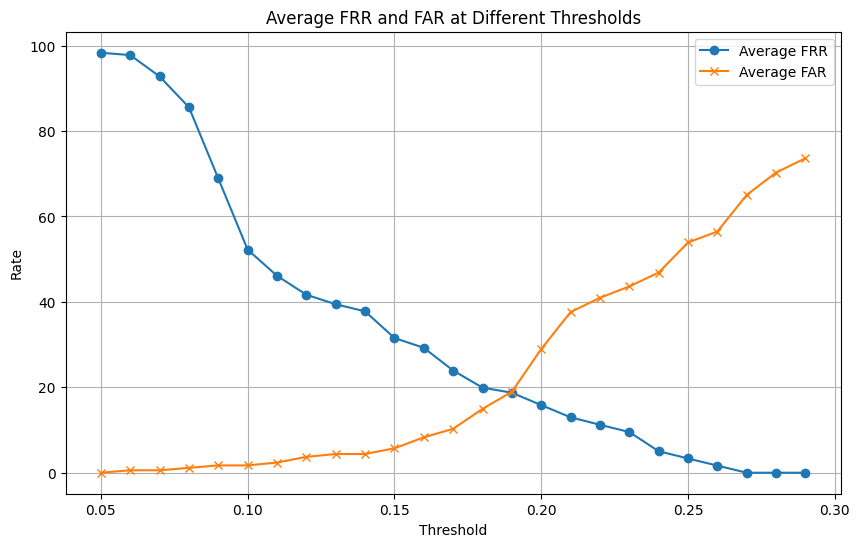

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a range of threshold values
thresholds = np.arange(0.05, 0.3, 0.01)
gestures = ['circle', 'square', 'triangle', 'bowtie', 'tornado', 'signature']

# Initialize lists to store averaged FRRs and FARs for each threshold
avg_FRRs = []
avg_FARs = []

for threshold in thresholds:
    total_FRR = 0
    total_FAR = 0
    count_gestures = 0

    for gesture in gestures:
        storedGesture_dfs, newGesture_dfs, otherGesture_dfs = g.load_gestures(f'files/{gesture}_28012024/')
        FRR, _ = g.get_FRR(storedGesture_dfs, newGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=threshold)
        total_FRR += FRR
        
        if gesture != 'signature':
            FAR, _ = g.get_FAR(storedGesture_dfs, otherGesture_dfs, algorithm=CHOOSED_ALGORITHM, threshold=threshold)
            total_FAR += FAR
            count_gestures += 1

    avg_FRRs.append(total_FRR / len(gestures))
    avg_FARs.append(total_FAR / count_gestures)

# Create a DataFrame
df = pd.DataFrame({'Average FRR': avg_FRRs, 'Average FAR': avg_FARs}, index=thresholds)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average FRR'], label='Average FRR', marker='o')
plt.plot(df.index, df['Average FAR'], label='Average FAR', marker='x')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Average FRR and FAR at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
df 

,Average FRR,Average FAR
0.05,98.333333,0.000000
0.06,97.777778,0.571429
0.07,92.777778,0.571429
0.08,85.555556,1.142857
0.09,68.888889,1.714286
0.10,52.222222,1.714286
0.11,46.111111,2.380952
0.12,41.666667,3.714286
0.13,39.444444,4.380952
0.14,37.777778,4.380952


In [7]:
CHOOSED_ALGORITHM

'ctw'